# TD1  : GLM pour données de comptages

Nous n'aurons pas le temps de voir la procédure *classique* pour réaliser des boostraps sous R. Cependant de nombreuses ressources existent sur internet, et au besoin, vous pouvez par exemple consulter ces tutoriels [1](https://www.statology.org/bootstrapping-in-r/) et [2](https://bookdown.org/jgscott/DSGI/the-bootstrap.html#bootstrapping-usually-but-not-always-works).

Pour ce TD et le suivant, nous allons analyser des données provenant, de cette [étude](https://doi.org/10.1289/EHP4898), qui visait à tester et caractériser le lien entre la température ambiante et la propension au suicide.

Nous allons travailler sur une version simplifiée de leur jeu de données.

1. Chargez les données et utilisez une régression linéaire simple pour tester s'il y a un lien entre le nombre de Suicides et la température ambiante.

In [1]:
options(stringsAsFactors = F)
library(DHARMa) # fonctions : simulateResiduals, testDispersion
library(ggplot2)

TooHot = read.csv('./Data/Suicides and Ambient Temperature.csv')
head(TooHot)

This is DHARMa 0.4.6. For overview type '?DHARMa'. For recent changes, type news(package = 'DHARMa')



,Country,Location,Suicides,Temperature
,<chr>,<chr>,<int>,<dbl>
1,Brazil,Belo Horizonte,843,22.0
2,Brazil,Brasilia,622,21.3
3,Brazil,Campo Grande,266,25.8
4,Brazil,Curitiba,635,17.6
5,Brazil,Fortaleza,886,27.0
6,Brazil,Maceio,169,24.9


In [2]:
length(unique(TooHot$Location))
nrow(TooHot)

[1] 339

[1] 341

In [3]:
length(unique(TooHot$Location))
nrow(TooHot)

w = table(TooHot$Location)>1

table(TooHot$Location)[w]

double = c('London', 'Vitoria')
TooHot[is.element(TooHot$Location,double),]
# ?is.element

[1] 339

[1] 341


 London Vitoria 
      2       2 

,Country,Location,Suicides,Temperature
,<chr>,<chr>,<int>,<dbl>
13,Brazil,Vitoria,218,26.8
21,Canada,London,581,8.0
183,Spain,Vitoria,447,11.9
199,UK,London,8976,11.6


Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”


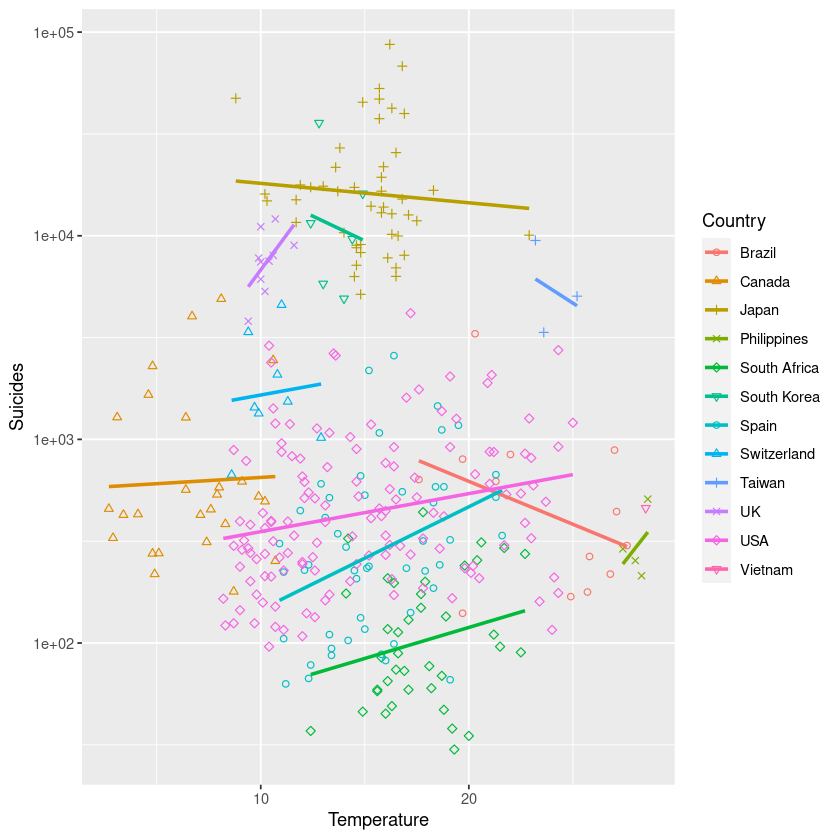

In [4]:
ylim = c(min(TooHot$Suicides), max(TooHot$Suicides))

ggplot(TooHot,aes(y = Suicides, x = Temperature, color=Country, shape=Country)) + 
  geom_point() + 
  scale_y_log10(limits = ylim) +
  scale_shape_manual(values = rep(1:6, len = 12)) +
  geom_smooth(method = "lm", fill = NA, formula = 'y ~ x')

# plot(TooHot$Suicides ~ TooHot$Temperature,col = as.numeric(as.factor(TooHot$Country)), log="y", pch=19)

Pour certains pays, la tendance *semble* un peu quadratique (canada, USA). Pour l'étudier, on va créer une variable, `Temperature2` contenant le carré des températures :

Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in qt((1 - level)/2, df):
“NaNs produced”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”


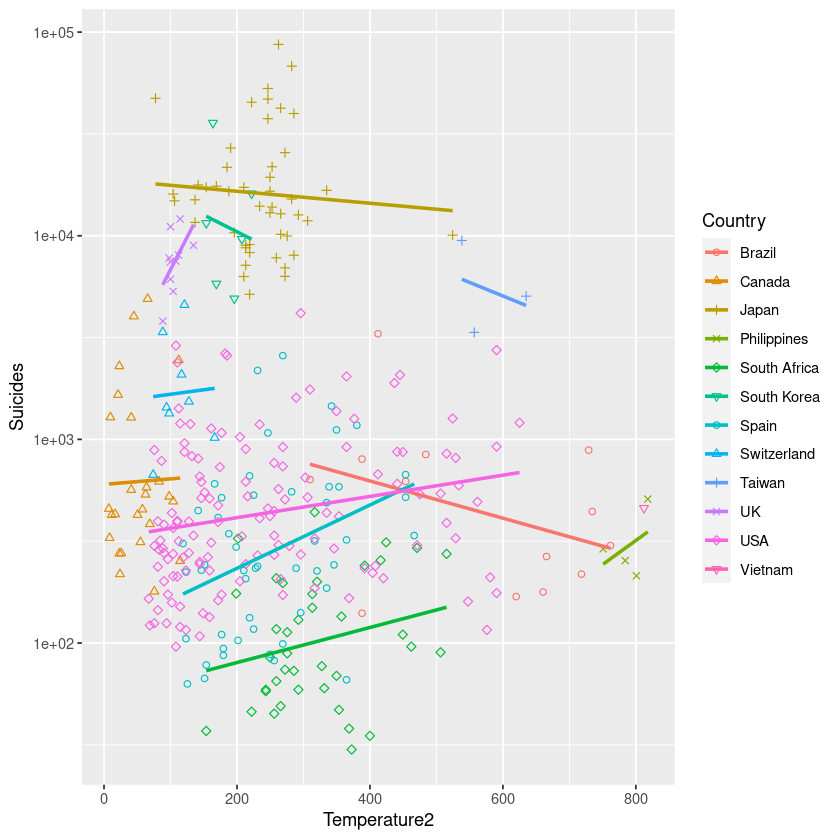

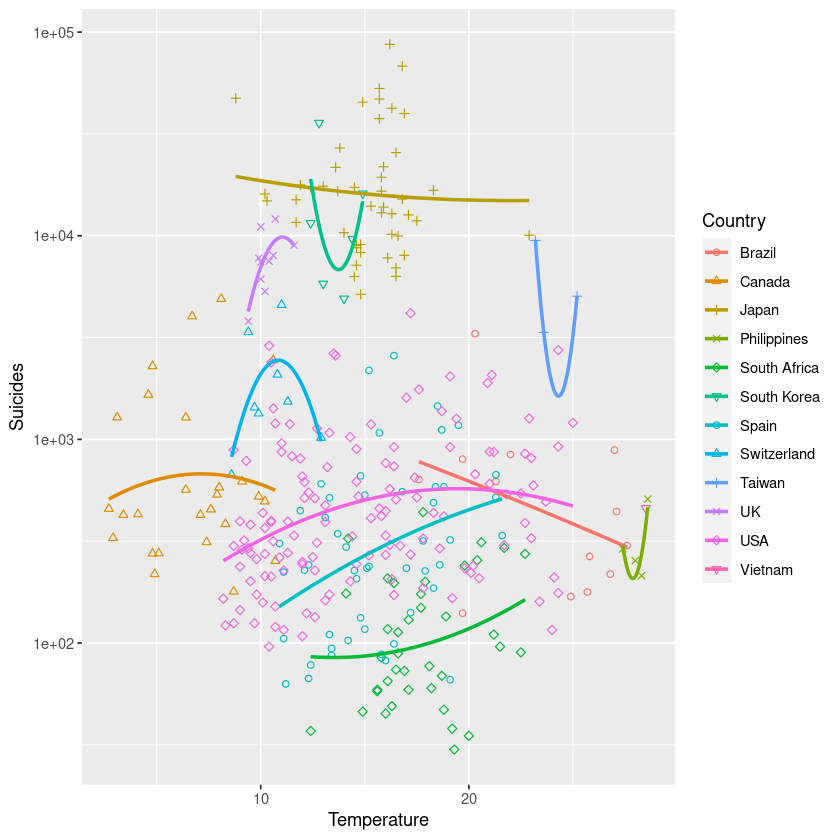

In [5]:
TooHot$Temperature2 = TooHot$Temperature^2

ggplot(TooHot,aes(y = Suicides, x = Temperature2, color=Country, shape=Country)) + 
  geom_point() + 
  scale_y_log10(limits = ylim) +
  scale_shape_manual(values = rep(1:6, len = 12)) +
  geom_smooth(method = "lm", fill = NA, formula = 'y ~ x')
# plot(TooHot$Suicides ~ TooHot$Temperature2,col = as.numeric(as.factor(TooHot$Country)), log="y", pch=19)

ggplot(TooHot,aes(y = Suicides, x = Temperature, color=Country, shape=Country)) + 
  geom_point() + 
  scale_y_log10(limits = ylim) +
  scale_shape_manual(values = rep(1:6, len = 12)) +
  geom_smooth(method = "lm", fill = NA, formula = 'y ~ x + I(x^2)')


 2a) Utilisez la variable `Temperature` pour ajuster un modèle linéaire simple à la variable `Suicides` $-$ qu'il faudra éventuellement transformer. </br>
 2b) Utilisez les variables `Temperature` et `Temperature2` pour ajuster un modèle linéaire quadratique à la variable `Suicides` $-$ qu'il faudra éventuellement transformer.

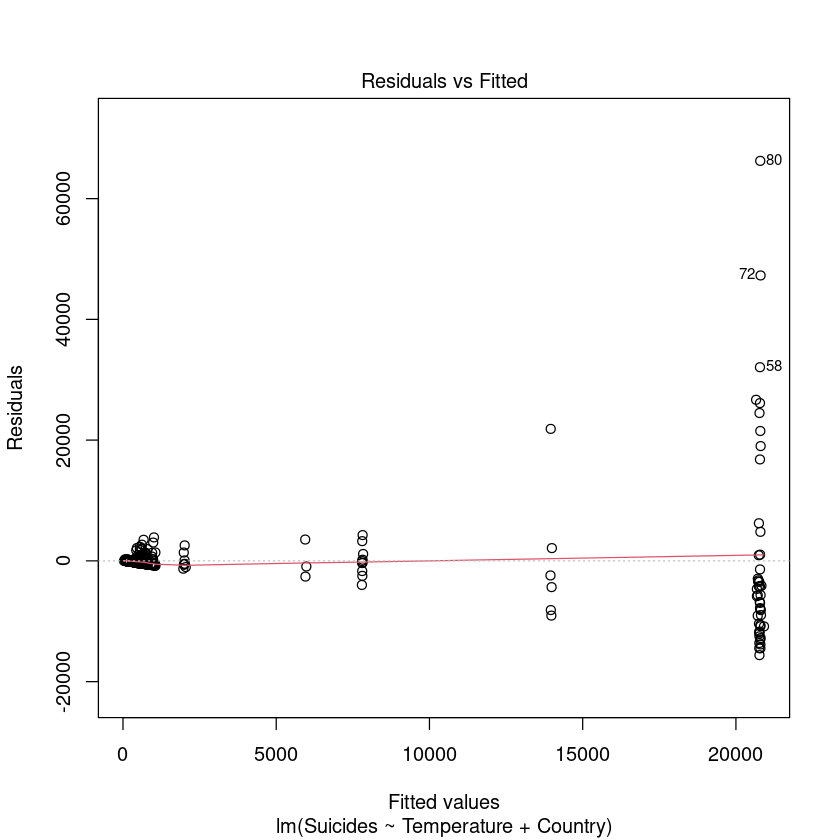

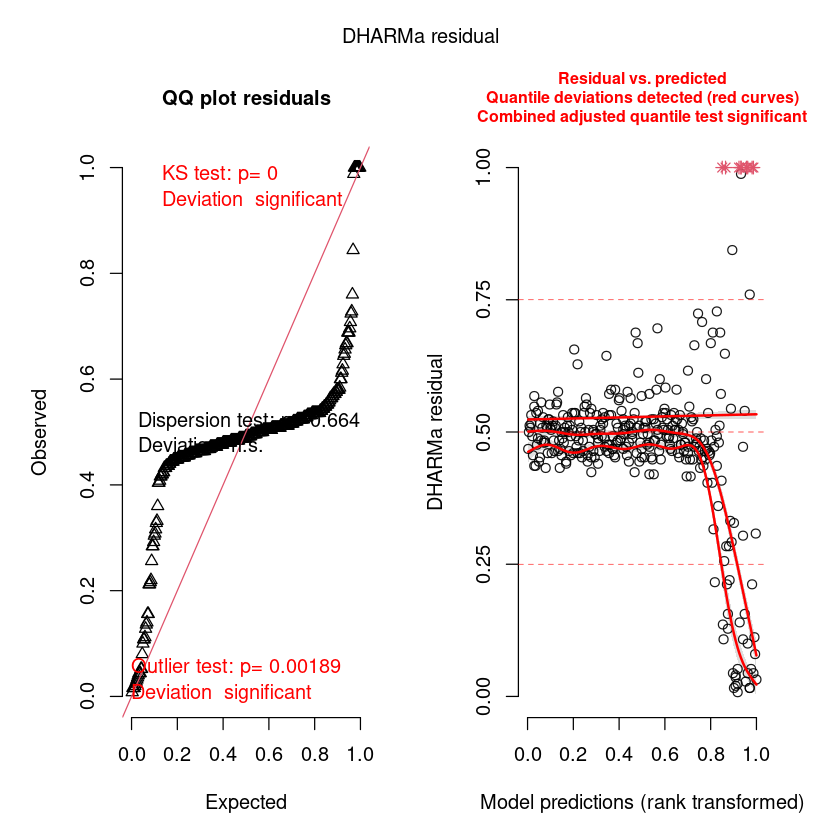

In [6]:
# 2. a) 
Mnorm  = lm(Suicides ~ Temperature + Country
            ,data = TooHot)
#qqnorm(resid(Mnorm)) ; qqline(resid(Mnorm))
plot(Mnorm ,1)
plot( simulateResiduals(Mnorm) )

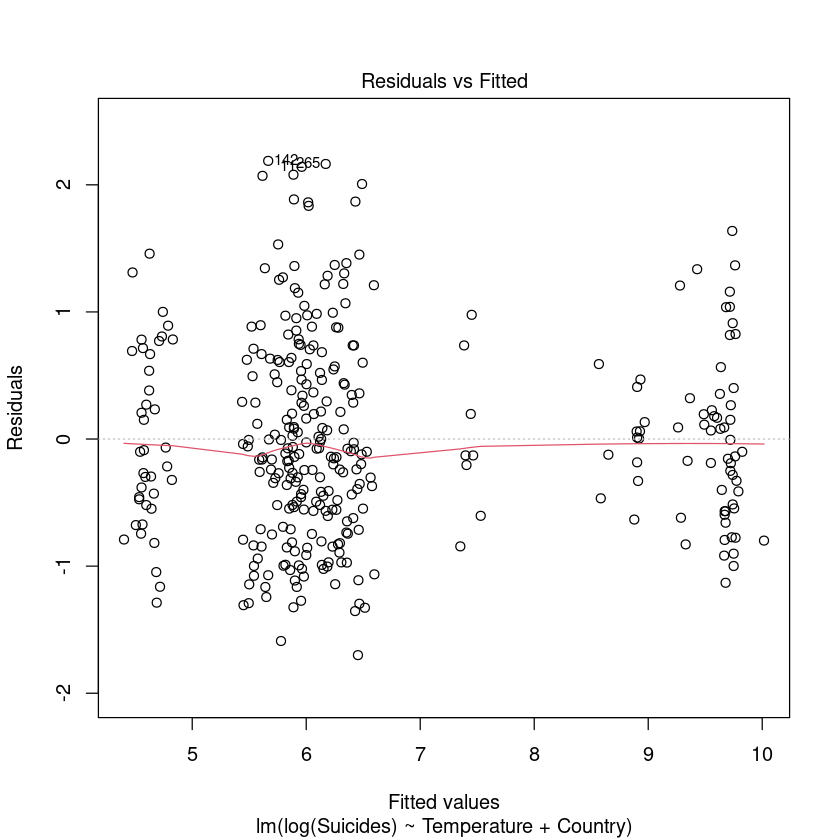

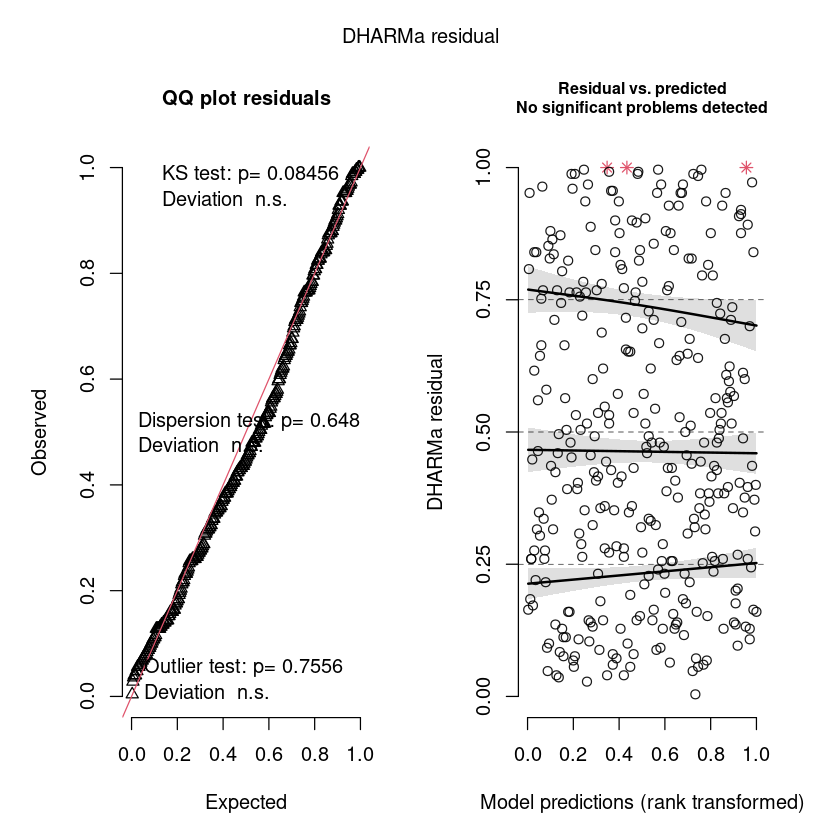

In [7]:
# 2. a) 
# Testons un modèle log normal :
Mlognorm  = lm(log(Suicides) ~ Temperature + Country
            ,data = TooHot)
plot(Mlognorm ,1)
plot( simulateResiduals(Mlognorm) )

In [8]:
# 2. a) 
anova(Mlognorm)
print(anova(Mlognorm))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Temperature,1,6.187485,6.187485,9.89192,1.811974e-03
Country,11,807.778430,73.434403,117.39944,1.289968e-106
Residuals,328,205.166943,0.625509,NA,NA


Analysis of Variance Table

Response: log(Suicides)
             Df Sum Sq Mean Sq  F value    Pr(>F)    
Temperature   1   6.19   6.187   9.8919  0.001812 ** 
Country      11 807.78  73.434 117.3994 < 2.2e-16 ***
Residuals   328 205.17   0.626                       
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [9]:
# 2. a) 
cbind(coef(Mlognorm))
unique(TooHot$Country)
length(unique(TooHot$Country))

(Intercept),5.11625248
Temperature,0.04158853
CountryCanada,1.03657218
CountryJapan,3.94698146
CountryPhilippines,-0.58244061
CountrySouth Africa,-1.23038722
CountrySouth Korea,3.63004698
CountrySpain,-0.13189888
CountrySwitzerland,1.87787376
CountryTaiwan,2.48612319
CountryUK,3.37053395


[1] "Brazil"       "Canada"       "Japan"        "South Korea"  "Philippines" 
 [6] "South Africa" "Spain"        "Switzerland"  "Taiwan"       "UK"          
[11] "USA"          "Vietnam"

[1] 12

## Pour plus tard <a id='later'></a>

In [10]:
# later
formula(Mlognorm)
print(anova(lm(log(Suicides) ~ Country + Temperature , data = TooHot)))

# lm(Suicides ~ Country * Temperature , data = TooHot)
# lm(Suicides ~ Country + Temperature + Country:Temperature , data = TooHot)

install.packages("car")
library(car)
print(Anova(Mlognorm))
# later

# back to 
# Terms added sequentially (first to last)

log(Suicides) ~ Temperature + Country

Analysis of Variance Table

Response: log(Suicides)
             Df Sum Sq Mean Sq F value    Pr(>F)    
Country      11 806.82  73.347 117.260 < 2.2e-16 ***
Temperature   1   7.15   7.150  11.431 0.0008096 ***
Residuals   328 205.17   0.626                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Installing package into ‘/home/hmh/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

Loading required package: carData



Anova Table (Type II tests)

Response: log(Suicides)
            Sum Sq  Df F value    Pr(>F)    
Temperature   7.15   1  11.431 0.0008096 ***
Country     807.78  11 117.399 < 2.2e-16 ***
Residuals   205.17 328                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[go to 'Terms added sequentially'](#Terms_added_sequentially)
## FIN de $-$ Pour plus tard <a id='later'></a>

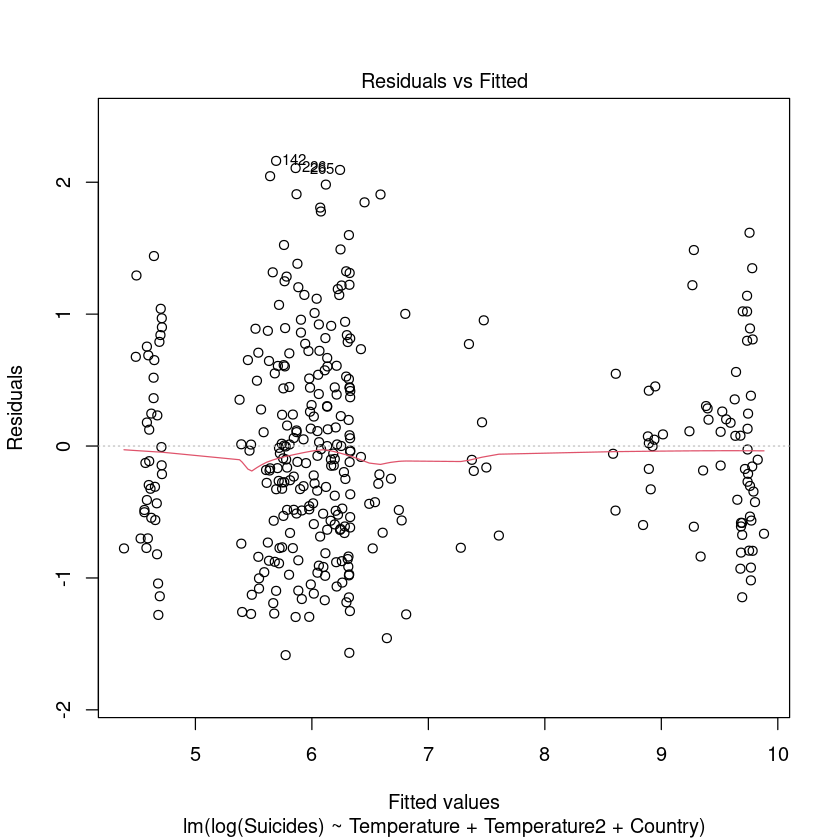

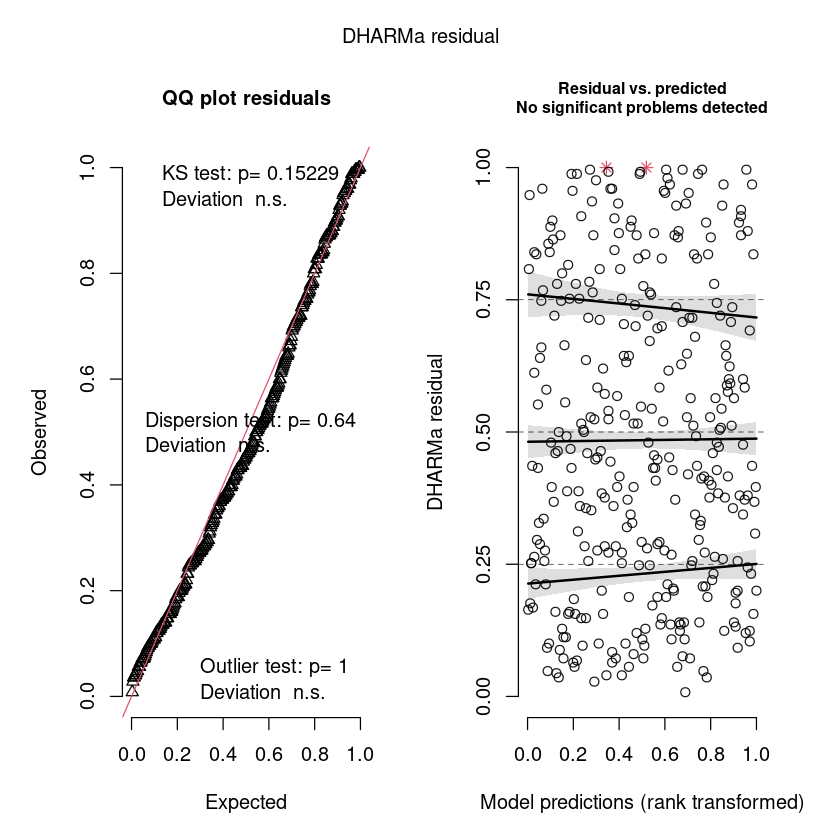

In [11]:
# 2. b) 
# Testons un modèle log normal QUADRATIQUE :
Mlognorm2  = lm(log(Suicides) ~ Temperature + Temperature2 + Country
            ,data = TooHot)
# same as
# Mnorm  = lm(log(Suicides) ~ Temperature + I(Temperature^2) + Country
#            ,data = TooHot)

plot(Mlognorm2 ,1)
plot( simulateResiduals(Mlognorm2) )

In [12]:
# 2. b) 
print(anova(Mlognorm2))

Analysis of Variance Table

Response: log(Suicides)
              Df Sum Sq Mean Sq  F value    Pr(>F)    
Temperature    1   6.19   6.187   9.9417 0.0017655 ** 
Temperature2   1   9.56   9.558  15.3571 0.0001084 ***
Country       11 799.87  72.715 116.8350 < 2.2e-16 ***
Residuals    327 203.52   0.622                       
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


2. c) </br>
Entre les 2 modèles, `Mlognorm` et `Mlognorm2`, lequel est le meilleur ? </br>
Autrement dit, le prédirait le mieux des données qu'il n'a jamais vu ? </br>
Ou encore, dans le cadre d'une [validation croisée](https://fr.wikipedia.org/wiki/Validation_crois%C3%A9e), lequel aurait le moins d'erreur de prédiction pour les données tests ? 

Le [Critère d'information d'Akaike](https://fr.wikipedia.org/wiki/Crit%C3%A8re_d%27information_d%27Akaike) (AIC) vise précisément à répondre à cette question.

In [13]:
# 2. c) 
AIC(Mlognorm , Mlognorm2)
diff(AIC(Mlognorm , Mlognorm2)[,2])

,df,AIC
,<dbl>,<dbl>
Mlognorm,14,822.4681
Mlognorm2,15,821.7154


[1] -0.7527872

Le modèle `Mlognorm2` est légèrement meilleur, mais cette différence est marginale. Nous nous concentrerons sur la forme quadratique dans la suite du TD.

> Petit aparté, si la transformation log n'avait pas fonctionné, nous aurions alors testé la transformation `boxcox` avec le code suivant :
```
### boxcox models ----
#' Start with the modèle with no transformation (`Mnorm`) and
#' compute the log likelihood for many values of lambda. This is implemented by the function `boxcox` from the `MASS` R package
bc <- MASS::boxcox(Mnorm,lambda=seq(-2,2,length=200))

# Select the best value of lambda
lambda = bc$x[which.max(bc$y)]

# Implement the transformation
z <- (TooHot$Suicides^lambda-1)/lambda

# Run the modèle on the transformed variable
Mboxcox_norm  = lm(z ~ Temperature + Temperature2 + Country ,   data = TooHot)

# Analyse the modèle as usually.
```

3a) Construisez un GLM Poisson analogue du modèle Mlognorm2 </br>
3b) Regardez la significativité i) des variables via des [tests de ratio de vraisemblance]() et ii) des coefficients </br>
3c) Bootstraper les coefficients
3c) Bootstraper les coefficients

In [14]:
#







###                  GLM Poisson ----- 
#'                     |                
#'                     |                 
#' ~~~~~~~~~~~~~~~~~~~~|~~~~~~~~~~~~~~~~~~~~~~~
#'                     |           
#'                     |           
#'                     |           
#'        ><(((°>      |      <°)))>< 
#'          ><(((°>    ¿    <°)))><  
#'        ><(((°>             <°)))>< 
#'                                           ><(((°>    
#'
#'
#'____;____(/_______§_______?___µ___\|/______\)_____

# 3a) 
Mpoisson = glm(Suicides ~ Temperature + Temperature2 + Country
            ,data = TooHot
            ,family = poisson(link = 'log')) # !!   <°)))><    !!

In [15]:
# 3b) i)significativité des variables via des tests de ratio de vraisemblance
# à la mano : 
# ajuster un modèle ne contenant pas la variable testée : 
#                                         _____________
Mpoisson_T2 = glm(Suicides ~ Temperature +               Country
             ,data = TooHot
             ,family = poisson(link = 'log')) # !!   <°)))><    !!

#' La vraisemblance de nos deux modèles : 
logLik(Mpoisson_T2)
logLik(Mpoisson)

stat_H0 = #'   -2log(  L(M_H0)/L(M_H1)  )    ~ chi²(p)
          #' = -2(log(L(M_H0)) - log(L(M_H1)  ))    ~ chi²(p)
          #' /!\  : les modèle doivent être nichés : M_H0 doit être un cas particulier de M_H1.
          #'      : Ici Mpoisson_T2 est un cas particulier de Mpoisson, où le coefficient associé à la variable Temperature2 est 0.
-2*(logLik(Mpoisson_T2) - logLik(Mpoisson))

pchisq(q = stat_H0, df = 1, lower.tail = F)

# Idem pour chaque variable

'log Lik.' -351293 (df=13)

'log Lik.' -350744.2 (df=14)

'log Lik.' 1.104217e-240 (df=13)

In [16]:
# 3b) i)
# à la "R, soit gentil s'il te plait" : 
print(anova(Mpoisson,test = 'LRT'))

Analysis of Deviance Table

Model: poisson, link: log

Response: Suicides

Terms added sequentially (first to last)


             Df Deviance Resid. Df Resid. Dev  Pr(>Chi)    
NULL                           340    3753771              
Temperature   1     5675       339    3748096 < 2.2e-16 ***
Temperature2  1   383158       338    3364939 < 2.2e-16 ***
Country      11  2666315       327     698624 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


### <span style="color:red"> Terms added sequentially </span> ??!<a id='Terms_added_sequentially'></a>
[go to 'later'](#later)

In [17]:
print(car::Anova(Mpoisson, test = 'LR',type='2'))
print(car::Anova(Mpoisson, test = 'LR',type='3'))

Analysis of Deviance Table (Type II tests)

Response: Suicides
             LR Chisq Df Pr(>Chisq)    
Temperature      1405  1  < 2.2e-16 ***
Temperature2     1098  1  < 2.2e-16 ***
Country       2666315 11  < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Analysis of Deviance Table (Type III tests)

Response: Suicides
             LR Chisq Df Pr(>Chisq)    
Temperature      1405  1  < 2.2e-16 ***
Temperature2     1098  1  < 2.2e-16 ***
Country       2666315 11  < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


<span style="font-size: 30px"> <span style="color:red"> >>>> </span> [Un lien sur les décompositions de type I, II et III](https://md.psych.bio.uni-goettingen.de/mv/unit/lm_cat/lm_cat_unbal_ss_explained.html) <span style="color:red"> <<<< </span>
 </span>

In [18]:
print(anova(Mpoisson, Mpoisson_T2,test = 'LRT'))

Analysis of Deviance Table

Model 1: Suicides ~ Temperature + Temperature2 + Country
Model 2: Suicides ~ Temperature + Country
  Resid. Df Resid. Dev Df Deviance  Pr(>Chi)    
1       327     698624                          
2       328     699722 -1  -1097.6 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [19]:
# 3b) ii)significativité des coefficients
summary(Mpoisson)


Call:
glm(formula = Suicides ~ Temperature + Temperature2 + Country, 
    family = poisson(link = "log"), data = TooHot)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-130.79   -20.06    -9.58     5.40   337.96  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)          5.948e+00  1.719e-02 345.967  < 2e-16 ***
Temperature          7.590e-02  2.044e-03  37.128  < 2e-16 ***
Temperature2        -2.160e-03  6.584e-05 -32.807  < 2e-16 ***
CountryCanada        5.408e-01  1.373e-02  39.374  < 2e-16 ***
CountryJapan         3.351e+00  1.202e-02 278.719  < 2e-16 ***
CountryPhilippines  -6.179e-01  3.067e-02 -20.148  < 2e-16 ***
CountrySouth Africa -1.724e+00  1.816e-02 -94.897  < 2e-16 ***
CountrySouth Korea   2.966e+00  1.265e-02 234.410  < 2e-16 ***
CountrySpain        -5.025e-01  1.364e-02 -36.826  < 2e-16 ***
CountrySwitzerland   1.100e+00  1.446e-02  76.059  < 2e-16 ***
CountryTaiwan        2.169e+00  1.302e-02 166.532  < 2e-

In [20]:
# 3c) Bootstraper les coefficients (ça peut être un peu long à exécuter)
 MpoissonBoot = car::Boot(Mpoisson)

 MpoissonBoot = as.data.frame(confint(MpoissonBoot))

 MpoissonBoot$overlap_0 = apply(MpoissonBoot,1,prod) < 0
 MpoissonBoot

,2.5 %,97.5 %,overlap_0
,<dbl>,<dbl>,<lgl>
(Intercept),2.96802033,8.746850273,FALSE
Temperature,-0.28321965,0.467291522,TRUE
Temperature2,-0.01343116,0.009293226,TRUE
CountryCanada,-0.94081883,1.724046165,TRUE
CountryJapan,2.33483069,4.335337403,FALSE
CountryPhilippines,-1.67040905,0.501522757,TRUE
CountrySouth Africa,-2.69082380,-0.720244064,FALSE
CountrySouth Korea,1.72958076,4.252707013,FALSE
CountrySpain,-1.59494284,0.456591248,TRUE


dispersion 
  11349.96

[1] 1

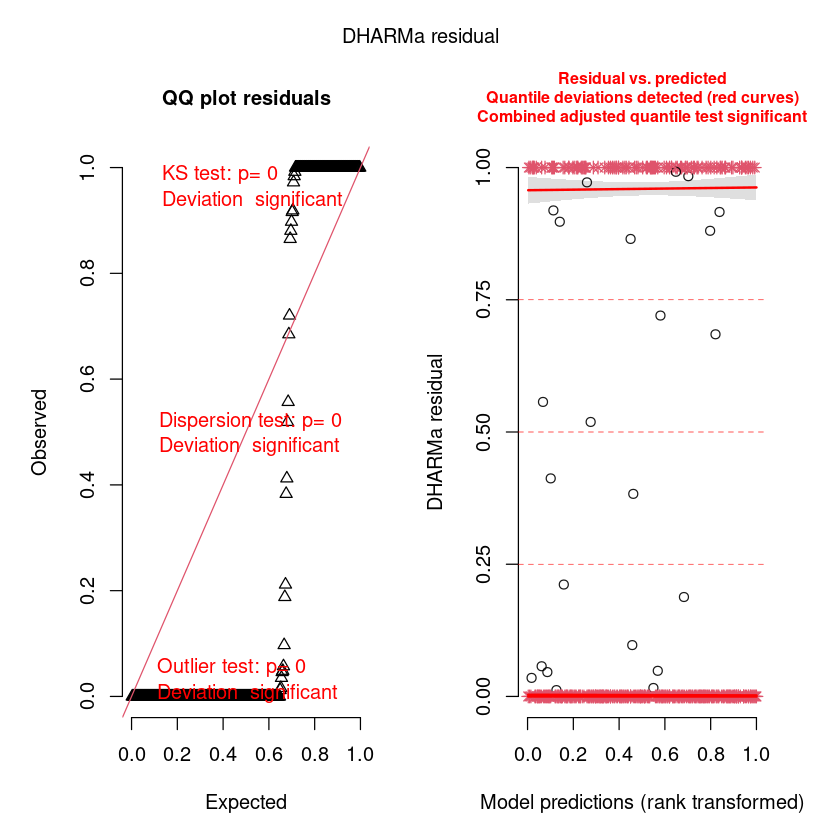

In [21]:
testDispersion(Mpoisson, plot = F)$statistic

summary(Mpoisson)$dispersion

plot( simulateResiduals(Mpoisson) )

=> Bullshit !

4. Testons différentes façons de prendre en compte la surdispersion </br>
   a) via un GLM quasiPoission </br>
   b) via un GLM negative binomial

In [22]:
# 4a)
### GLM quasipoisson -----
Mquasipoisson = glm(Suicides ~ Temperature + Temperature2 + Country
              ,data = TooHot, family = quasipoisson(link = 'log'))
summary(Mquasipoisson)$dispersion

[1] 2731.814

In [23]:
# plot( simulateResiduals(Mquasipoisson) )

mais ceci aurait donné le même résultat que `plot( simulateResiduals(Mpoisson) )` car la méthode quasi ajuste seulement les *p*.values et les erreurs standard des coefficients.

In [24]:
print(car::Anova(Mquasipoisson))

Analysis of Deviance Table (Type II tests)

Response: Suicides
             LR Chisq Df Pr(>Chisq)    
Temperature      0.51  1     0.4733    
Temperature2     0.40  1     0.5262    
Country        976.02 11     <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [25]:
# 4a)
summary(Mquasipoisson)


Call:
glm(formula = Suicides ~ Temperature + Temperature2 + Country, 
    family = quasipoisson(link = "log"), data = TooHot)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-130.79   -20.06    -9.58     5.40   337.96  

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          5.948019   0.898593   6.619 1.48e-10 ***
Temperature          0.075897   0.106843   0.710 0.477984    
Temperature2        -0.002160   0.003441  -0.628 0.530649    
CountryCanada        0.540800   0.717879   0.753 0.451793    
CountryJapan         3.350965   0.628390   5.333 1.81e-07 ***
CountryPhilippines  -0.617904   1.602924  -0.385 0.700128    
CountrySouth Africa -1.723764   0.949400  -1.816 0.070342 .  
CountrySouth Korea   2.965976   0.661327   4.485 1.01e-05 ***
CountrySpain        -0.502454   0.713133  -0.705 0.481578    
CountrySwitzerland   1.099714   0.755712   1.455 0.146572    
CountryTaiwan        2.168952   0.680735   3.186 0.001581 ** 



	DHARMa nonparametric dispersion test via sd of residuals fitted vs.
	simulated

data:  simulationOutput
dispersion = 1.1009, p-value = 0.592
alternative hypothesis: two.sided


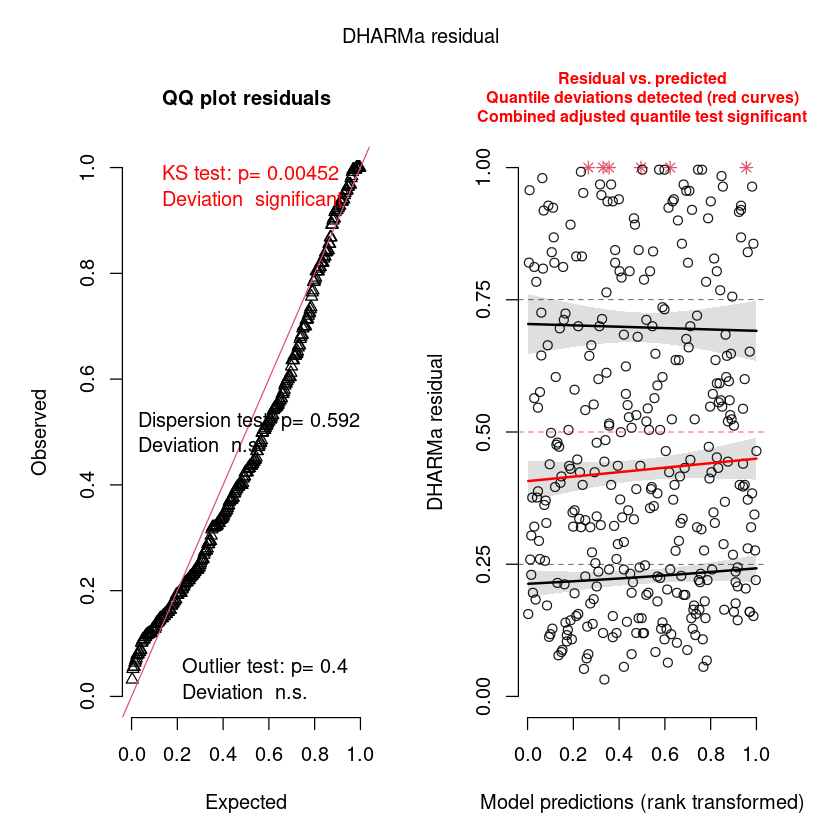

In [26]:
# 4b) ### GLM negative binomial -----

Mnb = MASS::glm.nb(Suicides ~ Temperature + Temperature2 + Country
                   ,data = TooHot)
testDispersion(Mnb, plot=F)
plot( simulateResiduals(Mnb) )

In [27]:
print(car::Anova(Mnb, test = 'LR',type='2'))
summary(Mnb)

Analysis of Deviance Table (Type II tests)

Response: Suicides
             LR Chisq Df Pr(>Chisq)    
Temperature      8.84  1   0.002947 ** 
Temperature2     5.72  1   0.016750 *  
Country       1400.34 11  < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



Call:
MASS::glm.nb(formula = Suicides ~ Temperature + Temperature2 + 
    Country, data = TooHot, init.theta = 1.694212072, link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9557  -1.0066  -0.4655   0.2258   3.2503  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          4.579748   0.511711   8.950  < 2e-16 ***
Temperature          0.196339   0.063770   3.079 0.002078 ** 
Temperature2        -0.004816   0.001955  -2.464 0.013753 *  
CountryCanada        1.251185   0.333762   3.749 0.000178 ***
CountryJapan         3.533233   0.287049  12.309  < 2e-16 ***
CountryPhilippines  -0.530182   0.469385  -1.130 0.258677    
CountrySouth Africa -1.646469   0.280413  -5.872 4.32e-09 ***
CountrySouth Korea   3.203688   0.414652   7.726 1.11e-14 ***
CountrySpain        -0.379761   0.282121  -1.346 0.178274    
CountrySwitzerland   1.503214   0.385129   3.903 9.50e-05 ***
CountryTaiwan        2.173917   0.492332   4.416 1.0

Nous avons donc 2 modèles qui sont censés gérer correctement la surdispersion, mais qui sont en complet désaccord sur l'effet de la température…

Solutions :
* ~On choisit le modèle qui nous arrange.~ (un exemple de P-hacking ([1](https://en.wikipedia.org/wiki/Data_dredging) et [2](https://doi.org/10.1186/s12903-016-0208-x)) très très classique… ; aussi appelé 'data-dredging'
* ~On compare l'AIC~ : cela reviendrait à comparer une vraisemblance et une quasi-vraisemblance
* Réaliser une réelle [validation croisée](https://cran.r-project.org/web/packages/cv/vignettes/cv.html)…
* **Comparer la relation moyenne-variance suposée par les modèles à la relation observée (empirique)**

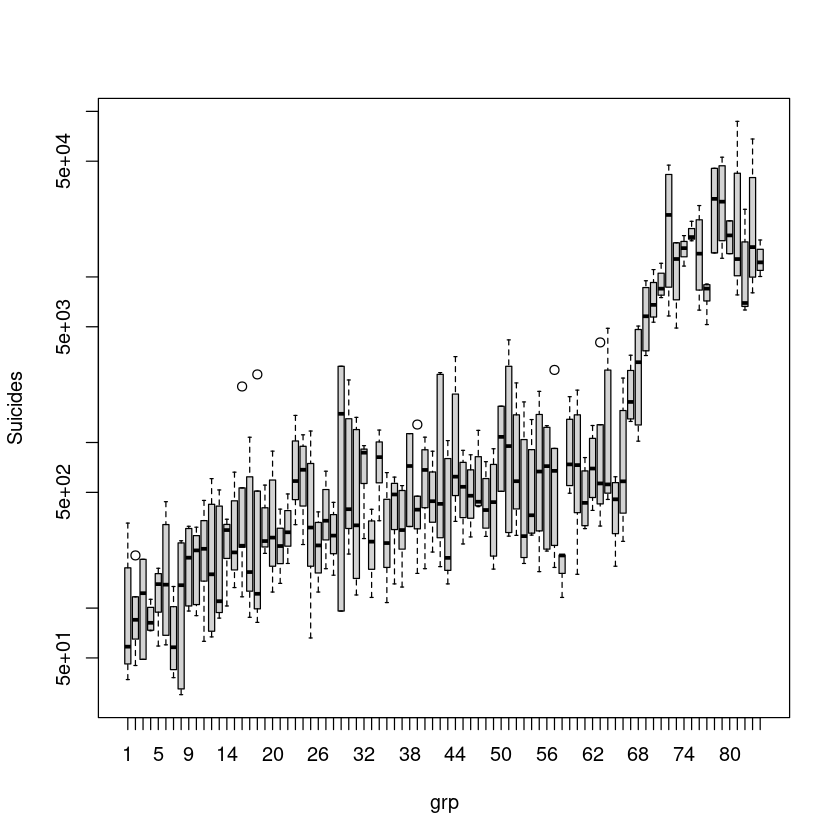

In [28]:
# Empirical mean - variance relationship :
Yhat = predict(Mlognorm2)
Q = quantile(Yhat, seq(0,1,length = round(nrow(TooHot)/4)))
TooHot$grp = 1
for(q in Q[-1]){
  TooHot$grp[Yhat > q] = max(TooHot$grp)+1
}
boxplot(Suicides ~ grp, data = TooHot,log="y")


 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
 6  5  2  4  4  4  4  4  4  5  3  4  5  3  4  5  3  5  3  4  7  3  3  4  4  4 
27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 
 5  5  2  4  5  3  4  4  4  4  6  2  5  4  3  5  5  3  4  4  4  4  6  2  4  4 
53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 
 4  4  4  4  5  3  4  4  4  4  5  4  4  4  4  4  4  4  4  4  4  4  4  4  6  2 
79 80 81 82 83 84 
 6  2  5  3  5  4 

,mean,var
,<dbl>,<dbl>
1,516.5000,58529.0
2,1419.0000,2677179.0
3,1218.4000,1624496.8
4,654.0000,138860.0
5,515.3333,115589.3
6,467.4000,172744.3


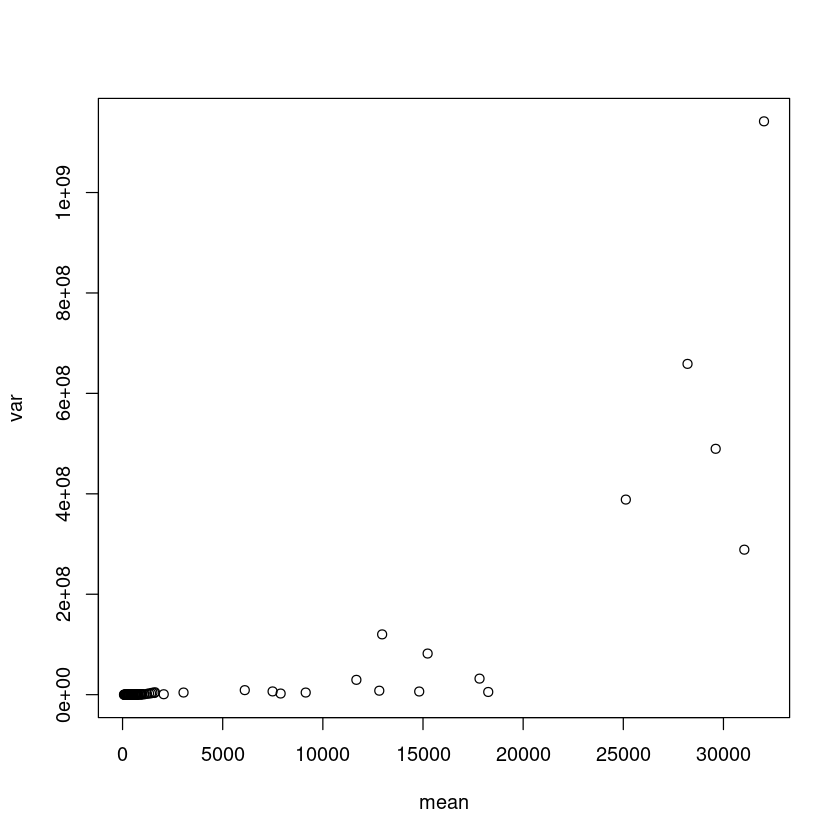

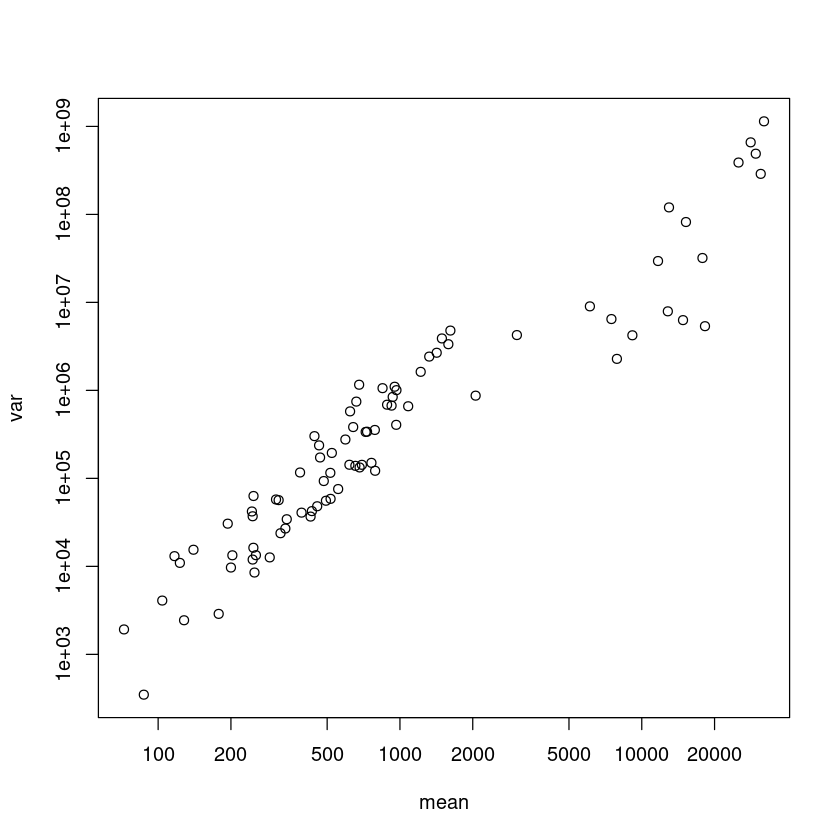

In [29]:

table(TooHot$grp)
EmpiricalMean_Variance = as.data.frame(t(sapply(unique(TooHot$grp), function(g){
  w=which(TooHot$grp==g)
  c('mean' = mean(TooHot$Suicides[w]), 'var' = var(TooHot$Suicides[w]))
  })))
head(EmpiricalMean_Variance)
plot(EmpiricalMean_Variance)
plot(EmpiricalMean_Variance,log='xy')


[1] 1.694212

Note that the chi2 test on Pearson residuals is biased for MIXED models towards underdispersion. Tests with alternative = two.sided or less are therefore not reliable. If you have random effects in your model, I recommend to test only with alternative = 'greater', i.e. test for overdispersion, or else use the DHARMa default tests which are unbiased. See help for details.



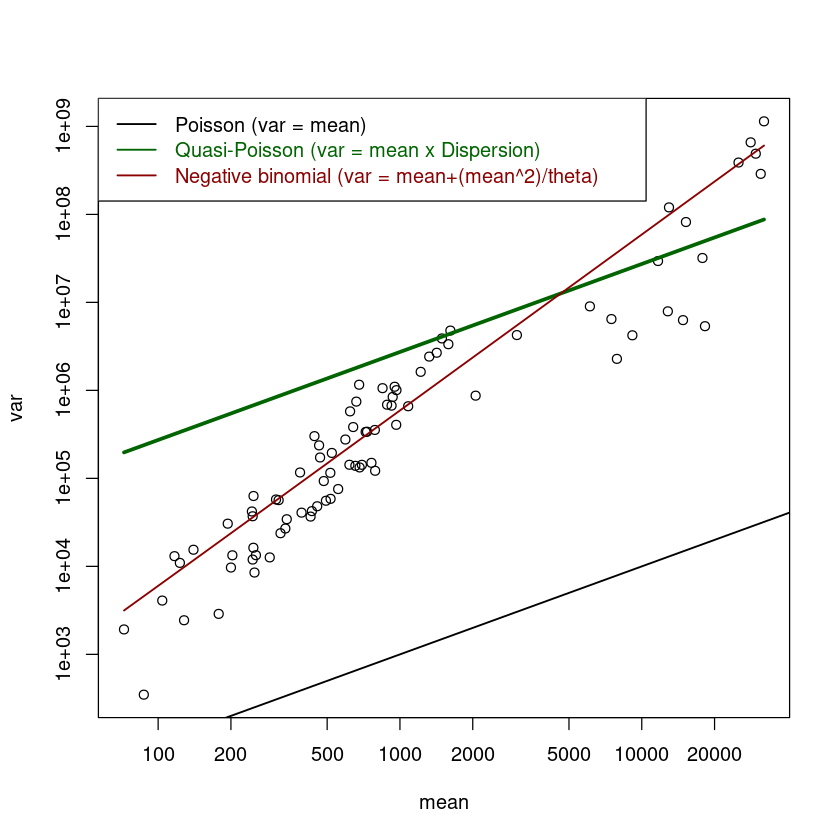

In [30]:
plot(EmpiricalMean_Variance,log='xy')
Mnb$theta # https://stats.stackexchange.com/questions/460040/what-is-theta-in-negative-binomial-distribution
µ   = seq(min(EmpiricalMean_Variance$mean,na.rm = T), max(EmpiricalMean_Variance$mean,na.rm = T), length = 10000)
# points(log(µ),log(Var),type='l')
abline(0,1, lwd = 1.5) # poisson
# points(µ , µ*testDispersion(Mpoisson, plot = F)$statistic , type ='l', col='darkgreen', lwd = 1.5) # quasipoisson
points(µ , µ*testDispersion(Mpoisson, plot = F,type = 'PearsonChisq')$statistic , type ='l', col='darkgreen', lwd = 1.5) # quasipoisson
points(µ , µ*summary(Mquasipoisson)$dispersion , type ='l', col='darkgreen', lwd = 3) # quasipoisson
points(µ , µ+(µ^2)/Mnb$theta , type='l', col='darkred', lwd = 1.5) # negative binomial
legend(x = 'topleft',legend = c("Poisson (var = mean)"
                               ,"Quasi-Poisson (var = mean x Dispersion)"
                               ,"Negative binomial (var = mean+(mean^2)/theta)"), col=c('black', "darkgreen", "darkred"), text.col = c('black', "darkgreen", "darkred"), lwd = 1.5)

$\Rightarrow$ **Pour ce jeu de donnée** le modèle négative binomial est bien meilleur. </br>
(Pour plus d'information sur ces 2 types de modèles, voir [lien](https://www.utstat.utoronto.ca/reid/sta2201s/QUASI-POISSON.pdf)) </br>
Visualisons les prédictions du modèle :

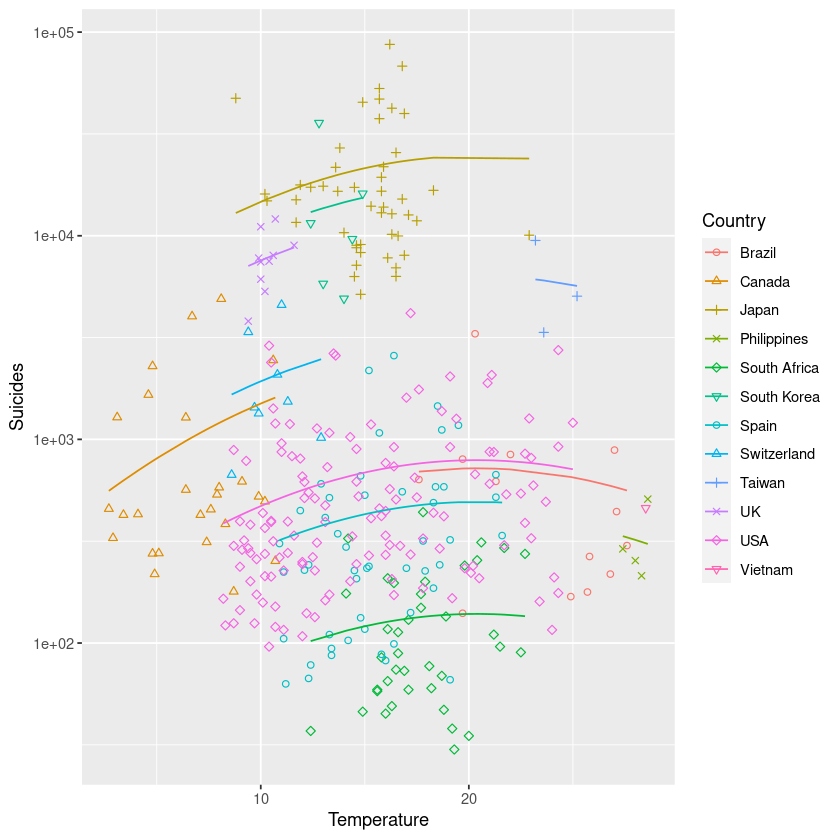

In [31]:
TooHot$Predictions = predict(Mnb, type='respons')

ggplot(TooHot,aes(y = Suicides, x = Temperature, color=Country, shape=Country)) + 
  geom_point() + 
  scale_y_log10(limits = ylim) +
  scale_shape_manual(values = rep(1:6, len = 12)) + 
  geom_line(aes(y=Predictions))

In [32]:
# ?testDispersion
# ?simulateResiduals

Problème pour obtenir des p.values avec lme4::lmer :

In [33]:
Mre = lme4::lmer(Suicides ~ Temperature + Temperature2 + (1|Country) 
              ,data = TooHot)
print(summary(Mre))

Linear mixed model fit by REML ['lmerMod']
Formula: Suicides ~ Temperature + Temperature2 + (1 | Country)
   Data: TooHot

REML criterion at convergence: 6970.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.2854 -0.0841 -0.0401  0.0140  9.9236 

Random effects:
 Groups   Name        Variance Std.Dev.
 Country  (Intercept) 42393386 6511    
 Residual             44969862 6706    
Number of obs: 341, groups:  Country, 12

Fixed effects:
             Estimate Std. Error t value
(Intercept)   2296.08    4294.04   0.535
Temperature    362.20     524.15   0.691
Temperature2   -11.32      15.87  -0.713

Correlation of Fixed Effects:
            (Intr) Tmprtr
Temperature -0.854       
Temperatur2  0.796 -0.982


=> pour les p.value, on utilise généralement afex::mixed

</br>

GLMM poisson avec Country en effet aléatoire :

In [34]:
Mre = lme4::glmer(Suicides ~ Temperature + Temperature2 + (1|Country) 
              ,data = TooHot, family = poisson(link = 'log'))
print(summary(Mre))

Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model failed to converge with max|grad| = 0.0867015 (tol = 0.002, component 1)”
Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model is nearly unidentifiable: very large eigenvalue
 - Rescale variables?;Model is nearly unidentifiable: large eigenvalue ratio
 - Rescale variables?”


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: poisson  ( log )
Formula: Suicides ~ Temperature + Temperature2 + (1 | Country)
   Data: TooHot

      AIC       BIC    logLik  deviance  df.resid 
 701637.2  701652.5 -350814.6  701629.2       337 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-109.05  -17.02   -8.63    5.80  452.27 

Random effects:
 Groups  Name        Variance Std.Dev.
 Country (Intercept) 2.382    1.543   
Number of obs: 341, groups:  Country, 12

Fixed effects:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)   6.733e+00  4.460e-01   15.10   <2e-16 ***
Temperature   7.592e-02  2.045e-03   37.13   <2e-16 ***
Temperature2 -2.161e-03  6.586e-05  -32.81   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) Tmprtr
Temperature -0.028       
Temperatur2  0.026 -0.984
optimizer (Nelder_Mead) convergence code: 0 

Rescale variables?

In [35]:
TooHot$Temperature_  = TooHot$Temperature/mean(TooHot$Temperature)
TooHot$Temperature2_ = TooHot$Temperature2/mean(TooHot$Temperature2)

Mre = lme4::glmer(Suicides ~ Temperature_ + Temperature2_ + (1|Country) 
              ,data = TooHot, family = poisson(link = 'log'))


In [36]:
testDispersion(Mre,plot = F)


	DHARMa nonparametric dispersion test via sd of residuals fitted vs.
	simulated

data:  simulationOutput
dispersion = 0.73497, p-value = 0.392
alternative hypothesis: two.sided


La surdispersion c'est envolée ?! ... c'est louche !

In [37]:
sw = suppressWarnings

#                                                              !           !!!!!!!!!
cat('\n DHARMa      , refit = F') ; sw(testDispersion(sw(simulateResiduals(Mre, refit = F)),type = "DHARMa"       ,plot=F)$statistic)
cat('\n PearsonChisq, refit = F') ; sw(testDispersion(sw(simulateResiduals(Mre, refit = F)),type = "PearsonChisq" ,plot=F)$statistic)
cat('\n DHARMa      , refit = T') ; sw(testDispersion(sw(simulateResiduals(Mre, refit = T)),type = "DHARMa"       ,plot=F)$statistic)
cat('\n PearsonChisq, refit = T') ; sw(testDispersion(sw(simulateResiduals(Mre, refit = T)),type = "PearsonChisq" ,plot=F)$statistic)



 DHARMa      , refit = F

dispersion 
  0.734972


 PearsonChisq, refit = F

Note that the chi2 test on Pearson residuals is biased for MIXED models towards underdispersion. Tests with alternative = two.sided or less are therefore not reliable. If you have random effects in your model, I recommend to test only with alternative = 'greater', i.e. test for overdispersion, or else use the DHARMa default tests which are unbiased. See help for details.



dispersion 
  2650.745


 DHARMa      , refit = T

dispersion 
  2727.561


 PearsonChisq, refit = T

Note that the chi2 test on Pearson residuals is biased for MIXED models towards underdispersion. Tests with alternative = two.sided or less are therefore not reliable. If you have random effects in your model, I recommend to test only with alternative = 'greater', i.e. test for overdispersion, or else use the DHARMa default tests which are unbiased. See help for details.



dispersion 
  2650.745

In [38]:
# ?afex::mixed
# ?contr.sum

In [39]:
Mre = afex::mixed(Suicides ~ Temperature_ + Temperature2_ + (1|Country),  data = TooHot, family = poisson(link = 'log'), method = 'LRT')
Mre


Contrasts set to contr.sum for the following variables: Country

Numerical variables NOT centered on 0: Temperature_, Temperature2_
If in interactions, interpretation of lower order (e.g., main) effects difficult.



Mixed Model Anova Table (Type 3 tests, LRT-method)

Model: Suicides ~ Temperature_ + Temperature2_ + (1 | Country)
Data: TooHot
Df full model: 4
         Effect df       Chisq p.value
1  Temperature_  1 1405.65 ***   <.001
2 Temperature2_  1 1098.31 ***   <.001
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘+’ 0.1 ‘ ’ 1

$\Bigg($ parenthèse sur les effets aléatoires sur la pente

à titre indicatif, pour mettre un effet aléatoire sur la pente, la notation `(variable_continue|effet aléatoire)`, ce qui ici donne :

In [40]:
MreSlopes = afex::mixed(Suicides ~ Temperature_ + Temperature2_ + (1+Temperature_+Temperature2_|Country)
                        ,  data = TooHot, family = poisson(link = 'log'), method = 'LRT')
MreSlopes

Contrasts set to contr.sum for the following variables: Country

Numerical variables NOT centered on 0: Temperature_, Temperature2_
If in interactions, interpretation of lower order (e.g., main) effects difficult.

Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“unable to evaluate scaled gradient”
Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model failed to converge: degenerate  Hessian with 1 negative eigenvalues”
Warning message:
“lme4 reported (at least) the following warnings for 'full':
  * unable to evaluate scaled gradient
  * Model failed to converge: degenerate  Hessian with 1 negative eigenvalues”


Mixed Model Anova Table (Type 3 tests, LRT-method)

Model: Suicides ~ Temperature_ + Temperature2_ + (1 + Temperature_ + 
Model:     Temperature2_ | Country)
Data: TooHot
Df full model: 9
         Effect df Chisq p.value
1  Temperature_  1  2.07    .150
2 Temperature2_  1  1.73    .188
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘+’ 0.1 ‘ ’ 1

In [41]:
summary(MreSlopes$full_model)

Warning message in vcov.merMod(object, use.hessian = use.hessian):
“variance-covariance matrix computed from finite-difference Hessian is
not positive definite or contains NA values: falling back to var-cov estimated from RX”
Warning message in vcov.merMod(object, correlation = correlation, sigm = sig):
“variance-covariance matrix computed from finite-difference Hessian is
not positive definite or contains NA values: falling back to var-cov estimated from RX”


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: poisson  ( log )
Formula: Suicides ~ Temperature_ + Temperature2_ + (1 + Temperature_ +  
    Temperature2_ | Country)
   Data: data

      AIC       BIC    logLik  deviance  df.resid 
 680697.0  680731.5 -340339.5  680679.0       332 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-108.72  -16.47   -7.80    4.48  458.97 

Random effects:
 Groups  Name          Variance Std.Dev. Corr       
 Country (Intercept)   141091   375.6               
         Temperature_  188133   433.7    -1.00      
         Temperature2_  20777   144.1     0.97 -0.99
Number of obs: 341, groups:  Country, 12

Fixed effects:
              Estimate Std. Error z value Pr(>|z|)
(Intercept)     180.91     113.57   1.593    0.111
Temperature_   -195.64     130.84  -1.495    0.135
Temperature2_    58.74      43.27   1.358    0.175

Correlation of Fixed Effects:
            (Intr) Tmprt_
Temperatur_ 


Ce modèle a du estimer, non-seulement les distributions des effets `Country` sur l'intercetp (`|1`), et les pentes `Temperature_` et `Temperature2_`, mais aussi les corrélation entre ces trois distributions ! </br>
Ça fait beaucoup de paramètres à estimer. </br>

Il est aussi possible de faire des modèles dits 'parsimonieux', en supposant que ces distribution sont indépendantes. Pour ce, on fixe la corrélation à 0 en utilisant `||` au lieu de `|` (pour plus de détail, voir [Bates et al., “Parsimonious Mixed Models.”]()) :

In [42]:
MreSlopes. = afex::mixed(Suicides ~ Temperature_ + Temperature2_ + (1+Temperature_+Temperature2_||Country)
                        ,  data = TooHot, family = poisson(link = 'log'), method = 'LRT')
# Ce qui aurait doné la même chose que :
# MreSlopes. = afex::mixed(Suicides ~ Temperature_ + Temperature2_ + (1|Country) + (0+Temperature_|Country) + (-1+Temperature2_|Country)
#                         ,  data = TooHot, family = poisson(link = 'log'), method = 'LRT')
MreSlopes.
summary(MreSlopes.$full_model)

Contrasts set to contr.sum for the following variables: Country

Numerical variables NOT centered on 0: Temperature_, Temperature2_
If in interactions, interpretation of lower order (e.g., main) effects difficult.

Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“unable to evaluate scaled gradient”
Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model failed to converge: degenerate  Hessian with 1 negative eigenvalues”
Warning message:
“lme4 reported (at least) the following warnings for 'full':
  * unable to evaluate scaled gradient
  * Model failed to converge: degenerate  Hessian with 1 negative eigenvalues”


Mixed Model Anova Table (Type 3 tests, LRT-method)

Model: Suicides ~ Temperature_ + Temperature2_ + (1 + Temperature_ + 
Model:     Temperature2_ || Country)
Data: TooHot
Df full model: 6
         Effect df Chisq p.value
1  Temperature_  1  2.20    .138
2 Temperature2_  1  1.63    .201
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘+’ 0.1 ‘ ’ 1

Warning message in vcov.merMod(object, use.hessian = use.hessian):
“variance-covariance matrix computed from finite-difference Hessian is
not positive definite or contains NA values: falling back to var-cov estimated from RX”
Warning message in vcov.merMod(object, correlation = correlation, sigm = sig):
“variance-covariance matrix computed from finite-difference Hessian is
not positive definite or contains NA values: falling back to var-cov estimated from RX”


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: poisson  ( log )
Formula: Suicides ~ Temperature_ + Temperature2_ + (1 + Temperature_ +  
    Temperature2_ || Country)
   Data: data

      AIC       BIC    logLik  deviance  df.resid 
 680813.6  680836.6 -340400.8  680801.6       335 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-108.72  -16.47   -7.80    4.47  458.97 

Random effects:
 Groups    Name          Variance Std.Dev.
 Country   (Intercept)   120126   346.6   
 Country.1 Temperature_  157104   396.4   
 Country.2 Temperature2_  18638   136.5   
Number of obs: 341, groups:  Country, 12

Fixed effects:
              Estimate Std. Error z value Pr(>|z|)
(Intercept)     167.81     104.49   1.606    0.108
Temperature_   -180.63     116.88  -1.545    0.122
Temperature2_    53.98      40.94   1.318    0.187

Correlation of Fixed Effects:
            (Intr) Tmprt_
Temperatur_ -0.036       
Temperatr2_ -0.005 -0.041

fin de la parenthèse sur les effets aléatoires sur la pente $\Bigg)$ 


### La stratégie Observation Level Random Effect

In [43]:
TooHot$city_unique = paste(TooHot$Country, TooHot$Location, sep='; ')
head(TooHot$city_unique)
head(table(TooHot$city_unique))
table(table(TooHot$city_unique))

[1] "Brazil; Belo Horizonte" "Brazil; Brasilia"       "Brazil; Campo Grande"  
[4] "Brazil; Curitiba"       "Brazil; Fortaleza"      "Brazil; Maceio"


Brazil; Belo Horizonte       Brazil; Brasilia   Brazil; Campo Grande 
                     1                      1                      1 
      Brazil; Curitiba      Brazil; Fortaleza         Brazil; Maceio 
                     1                      1                      1 


  1 
341 

Note that the chi2 test on Pearson residuals is biased for MIXED models towards underdispersion. Tests with alternative = two.sided or less are therefore not reliable. If you have random effects in your model, I recommend to test only with alternative = 'greater', i.e. test for overdispersion, or else use the DHARMa default tests which are unbiased. See help for details.



dispersion 
0.006659166

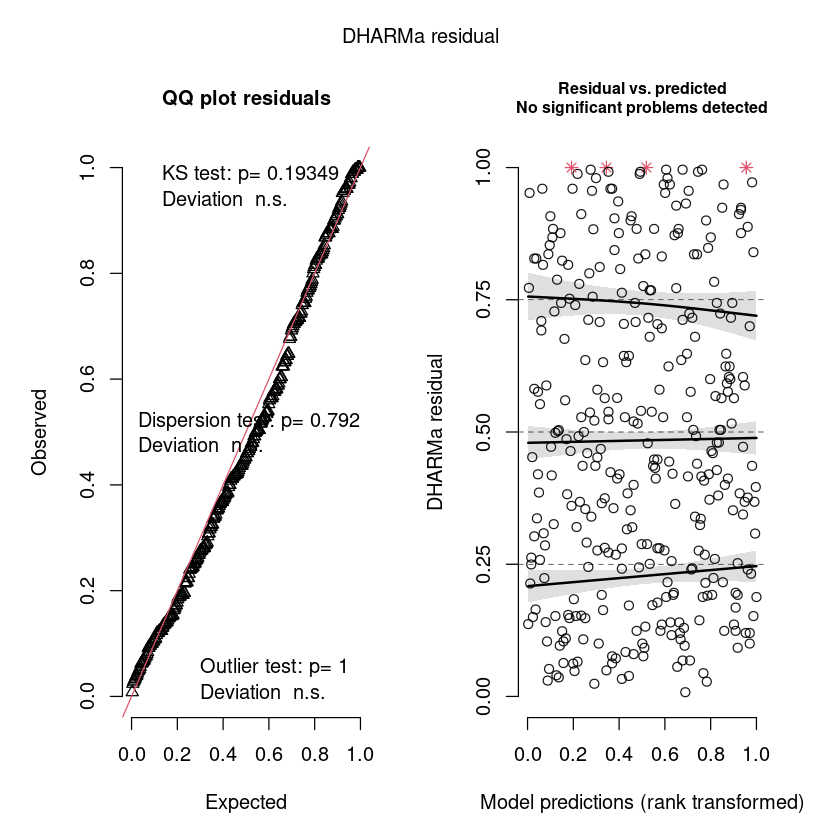

In [44]:
Molre = lme4::glmer(Suicides ~ Temperature_ + Temperature2_ + Country + (1|city_unique)
              ,data = TooHot, family = poisson(link = 'log'))

# Too long to run
# S = sw(simulateResiduals(Molre, refit = T))
# plot( S )
# sw(testDispersion(S,type = "DHARMa"       ,plot=F)$statistic)

S = sw(simulateResiduals(Molre, refit = F))
plot( S )
sw(testDispersion(S,type = "PearsonChisq"       ,plot=F)$statistic)


Note that the chi2 test on Pearson residuals is biased for MIXED models towards underdispersion. Tests with alternative = two.sided or less are therefore not reliable. If you have random effects in your model, I recommend to test only with alternative = 'greater', i.e. test for overdispersion, or else use the DHARMa default tests which are unbiased. See help for details.



dispersion 
0.006142444

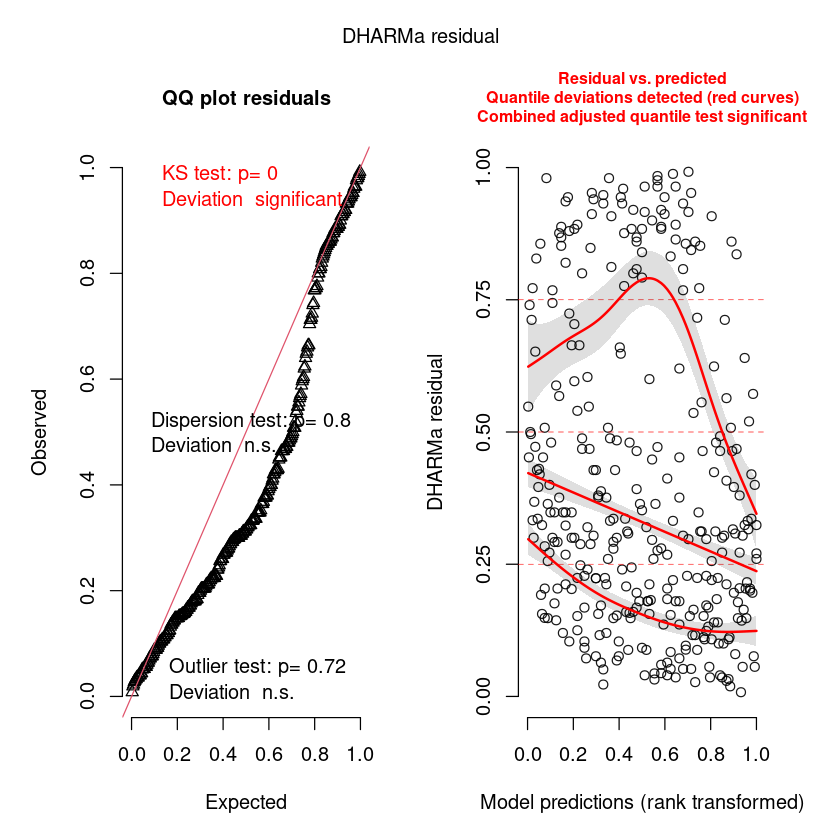

In [45]:
Mre_olre = lme4::glmer(Suicides ~ Temperature_ + Temperature2_ + (1|Country) + (1|city_unique)
              ,data = TooHot, family = poisson(link = 'log'))
S = sw(simulateResiduals(Mre_olre, refit = F))
plot( S )
sw(testDispersion(S,type = "PearsonChisq"       ,plot=F)$statistic)


In [46]:
str(lme4::ranef(Mre_olre))

List of 2
 $ city_unique:'data.frame':	341 obs. of  1 variable:
  ..$ (Intercept): num [1:341] 0.562 0.257 -0.515 0.328 0.729 ...
  ..- attr(*, "postVar")= num [1, 1, 1:341] 0.0478 0.0481 0.0499 0.0481 0.0477 ...
 $ Country    :'data.frame':	12 obs. of  1 variable:
  ..$ (Intercept): num [1:12] -1.1302 -0.0662 2.5342 -1.3558 -2.5904 ...
  ..- attr(*, "postVar")= num [1, 1, 1:12] 0.0468 0.0236 0.013 0.1464 0.016 ...
 - attr(*, "class")= chr "ranef.mer"


In [47]:
head(lme4::ranef(Mre_olre)$city_unique)
head(lme4::ranef(Mre_olre)$Country)


,(Intercept)
,<dbl>
Brazil; Belo Horizonte,0.5623141
Brazil; Brasilia,0.2569370
Brazil; Campo Grande,-0.5146589
Brazil; Curitiba,0.3278396
Brazil; Fortaleza,0.7289188
Brazil; Maceio,-0.9886323


,(Intercept)
,<dbl>
Brazil,-1.13023396
Canada,-0.06624324
Japan,2.53417153
Philippines,-1.35576942
South Africa,-2.59038110
South Korea,2.14447259


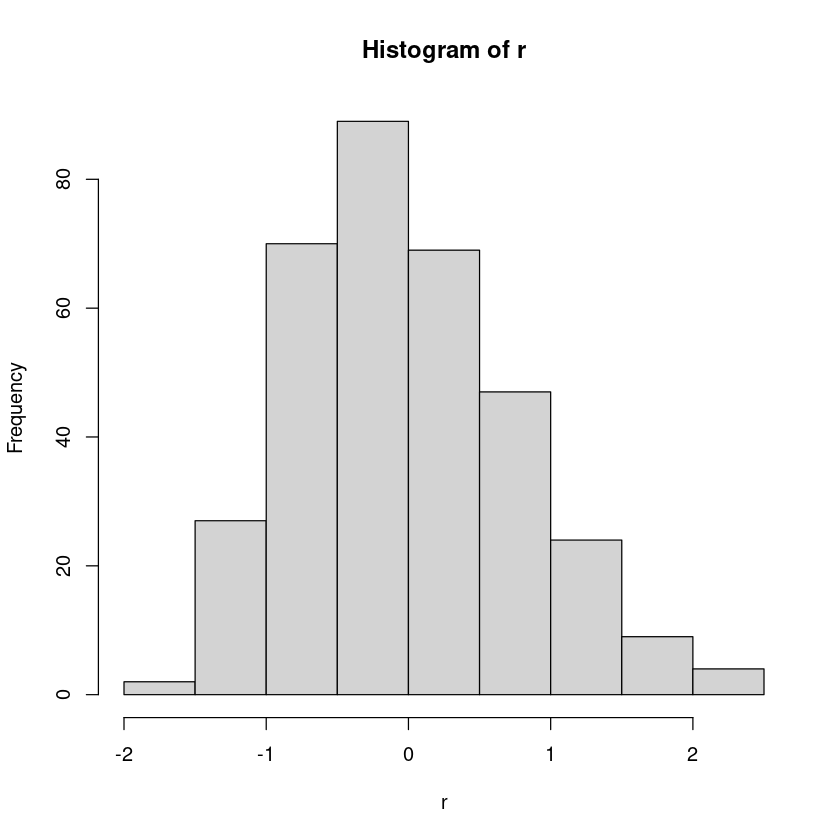

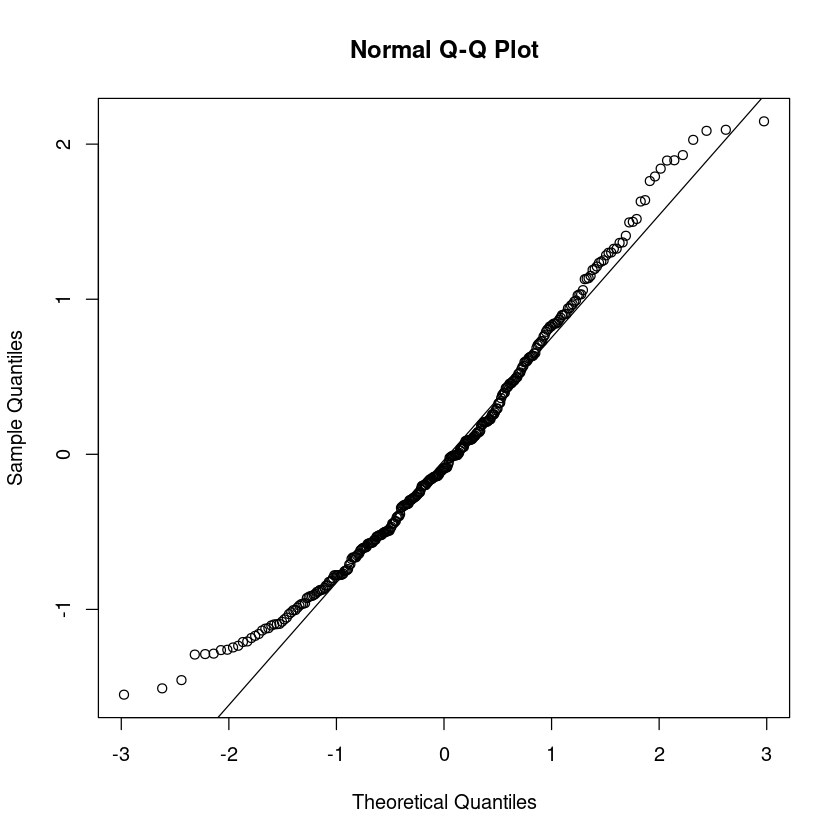

In [48]:
r = lme4::ranef(Mre_olre)$city_unique[,1]

hist(r)
qqnorm(r) ; qqline(r)

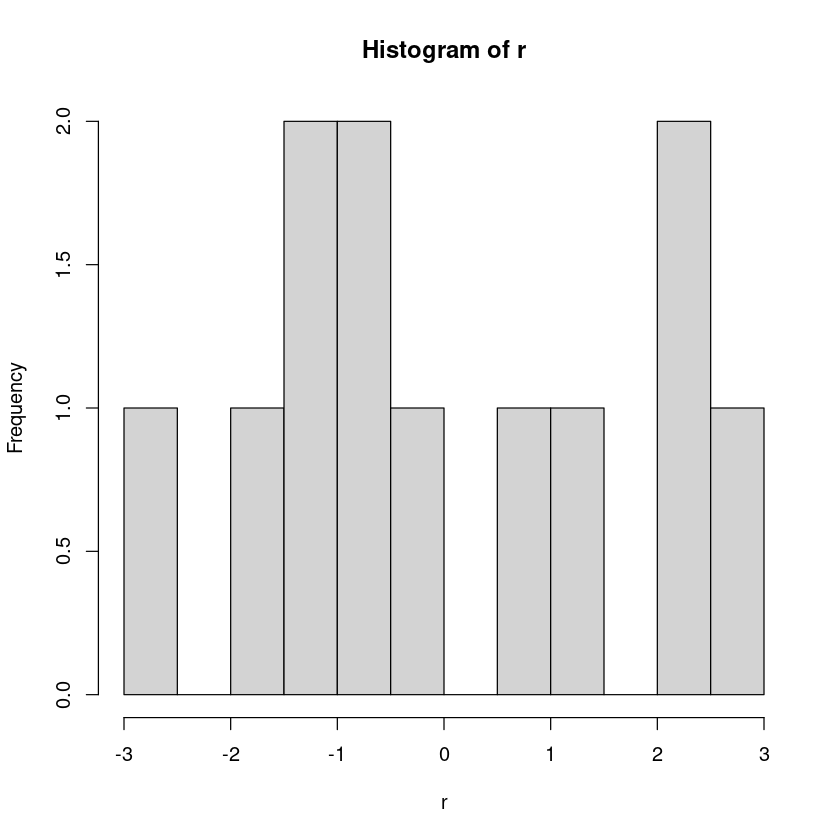

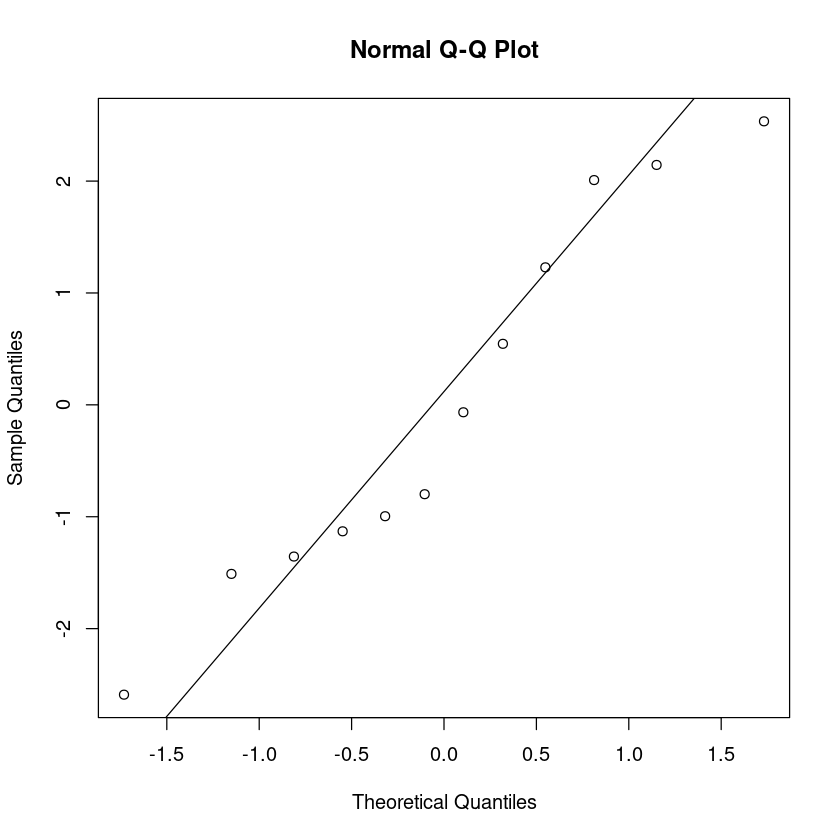

In [49]:
r = lme4::ranef(Mre_olre)$Country[    ,1]

hist(r,breaks = 10)
qqnorm(r) ; qqline(r)

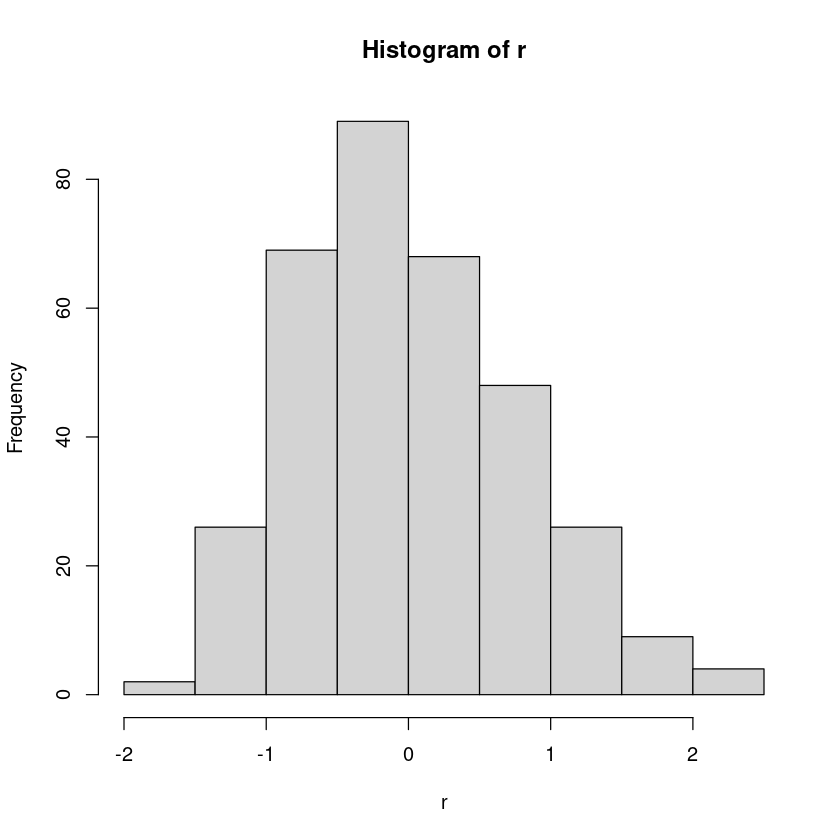

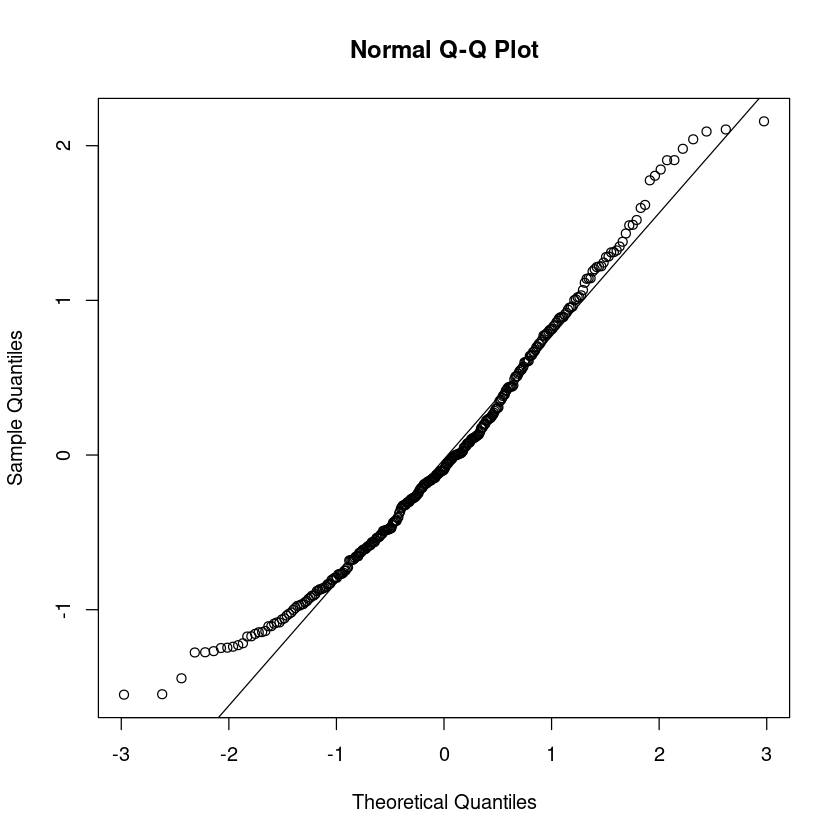

In [50]:
r = lme4::ranef(Molre)$city_unique[,1]

hist(r)
qqnorm(r) ; qqline(r)

In [51]:
Molre = afex::mixed(Suicides ~ Temperature_ + Temperature2_ + Country + (1|city_unique)
              ,data = TooHot, family = poisson(link = 'log'), method = "LRT")

Contrasts set to contr.sum for the following variables: Country, city_unique

Numerical variables NOT centered on 0: Temperature_, Temperature2_
If in interactions, interpretation of lower order (e.g., main) effects difficult.



<span style="color:red"> <u>/!\\</u></span>
> Numerical variables NOT centered on 0: Temperature_, Temperature2_
> If in interactions, interpretation of lower order (e.g., main) effects difficult.
>
For more information : [Simple means to improve the interpretability of regression coefficients](https://doi.org/10.1111/j.2041-210X.2010.00012.x)


In [52]:
Molre

Mixed Model Anova Table (Type 3 tests, LRT-method)

Model: Suicides ~ Temperature_ + Temperature2_ + Country + (1 | city_unique)
Data: TooHot
Df full model: 15
         Effect df      Chisq p.value
1  Temperature_  1     5.16 *    .023
2 Temperature2_  1     2.75 +    .097
3       Country 11 543.72 ***   <.001
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘+’ 0.1 ‘ ’ 1

In [53]:
afex::mixed(Suicides ~ Temperature_ + Temperature2_ + Country + (1|city_unique)
              ,data = TooHot, family = poisson(link = 'log'), method = "LRT",type=2)

Contrasts set to contr.sum for the following variables: Country, city_unique

Numerical variables NOT centered on 0: Temperature_, Temperature2_
If in interactions, interpretation of lower order (e.g., main) effects difficult.



Mixed Model Anova Table (Type 2 tests, LRT-method)

Model: Suicides ~ Temperature_ + Temperature2_ + Country + (1 | city_unique)
Data: TooHot
Df full model(s): 15, 15, 15
         Effect df      Chisq p.value
1  Temperature_  1     5.16 *    .023
2 Temperature2_  1     2.75 +    .097
3       Country 11 543.72 ***   <.001
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘+’ 0.1 ‘ ’ 1

In [54]:
# negative binomial with random effect
Mre_nb = lme4::glmer.nb(Suicides ~ Temperature_ + Temperature2_ + (1|Country)
              ,data = TooHot)

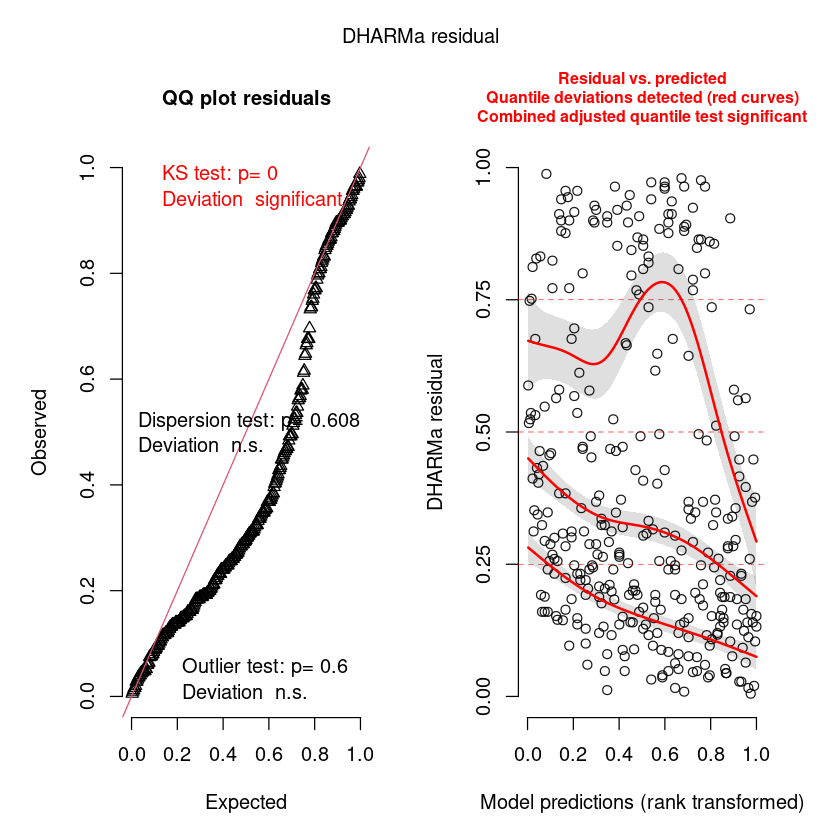

In [55]:
S = simulateResiduals(Mre_nb, refit = F)
plot( S )


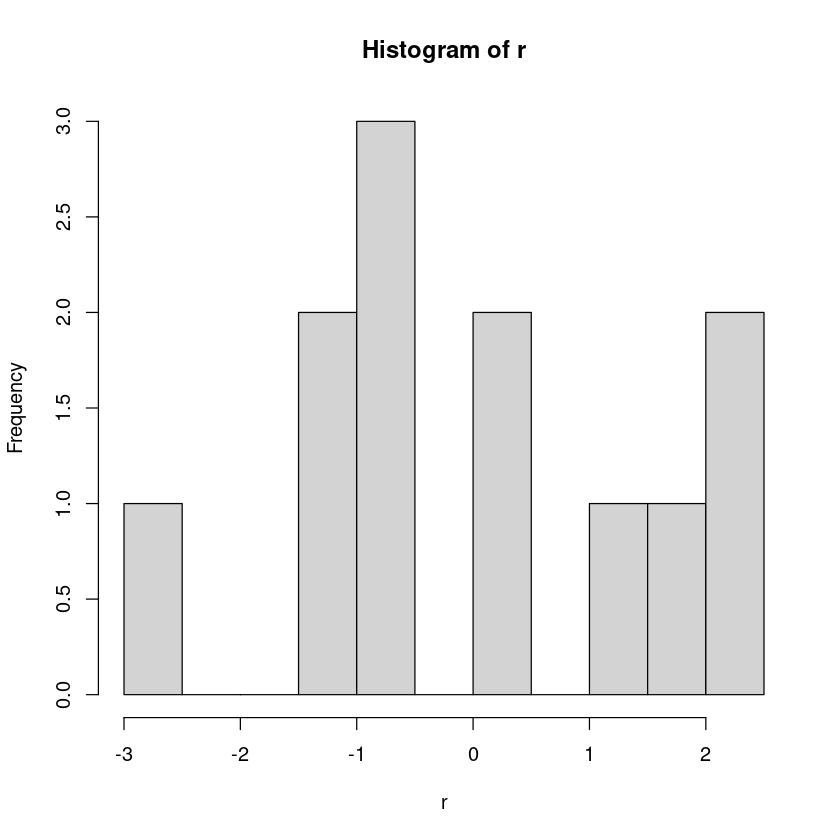

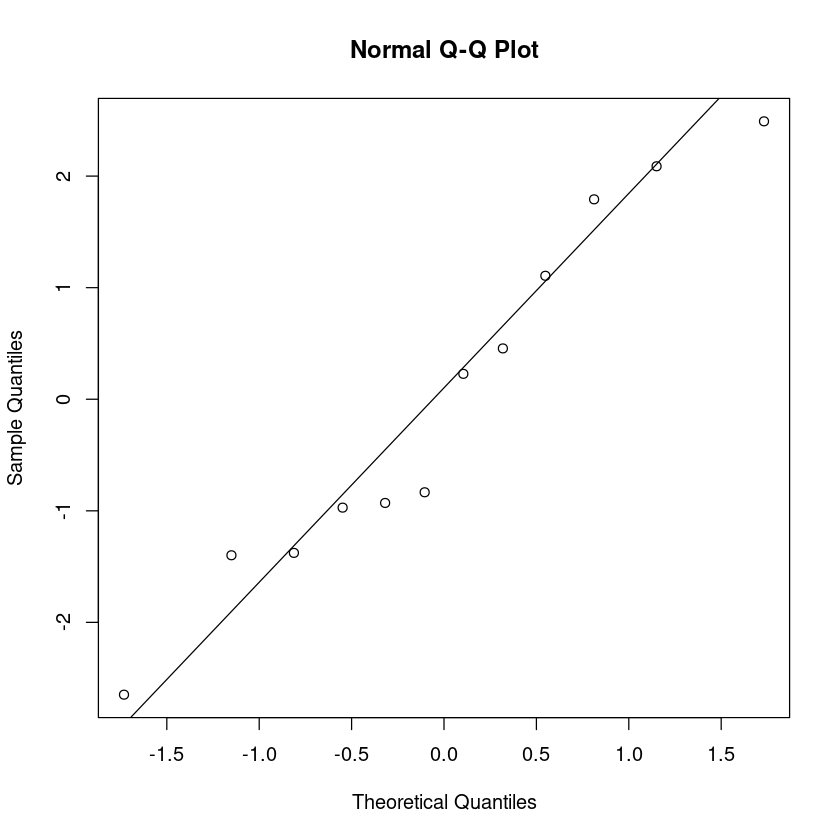

In [56]:
r = lme4::ranef(Mre_nb)$Country[,1]

hist(r,breaks = 15)
qqnorm(r) ; qqline(r)

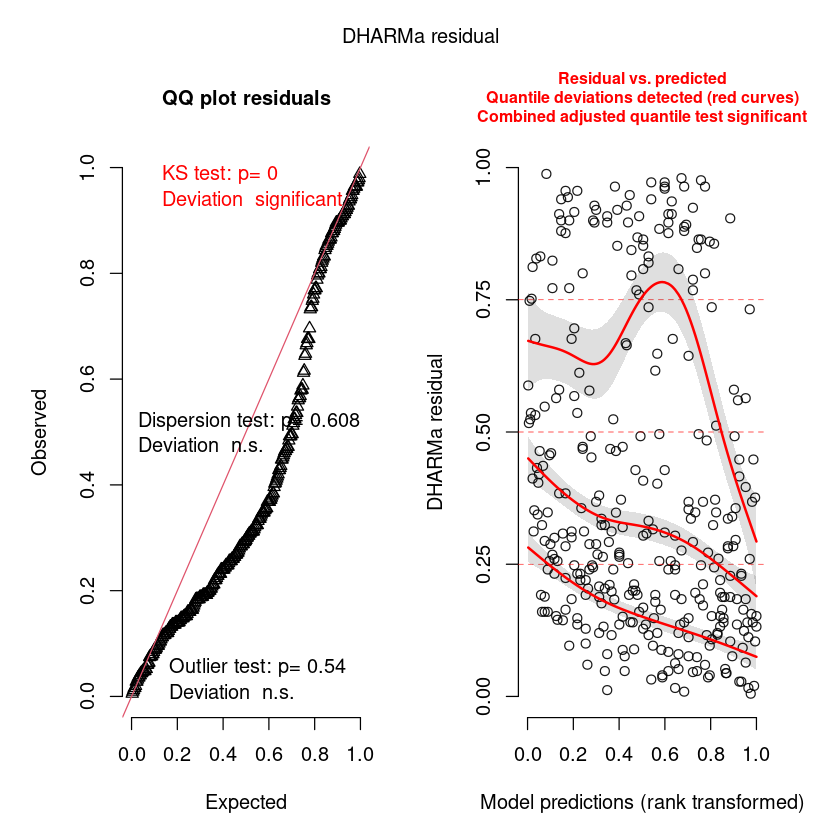

In [57]:
plot(simulateResiduals(Mre_nb, refit = F))

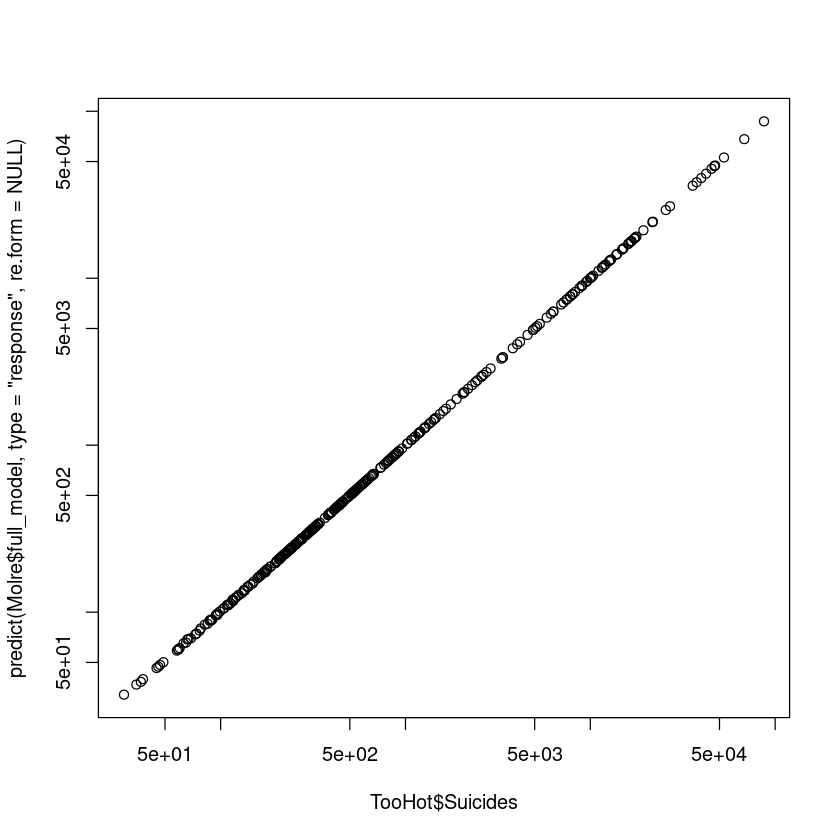

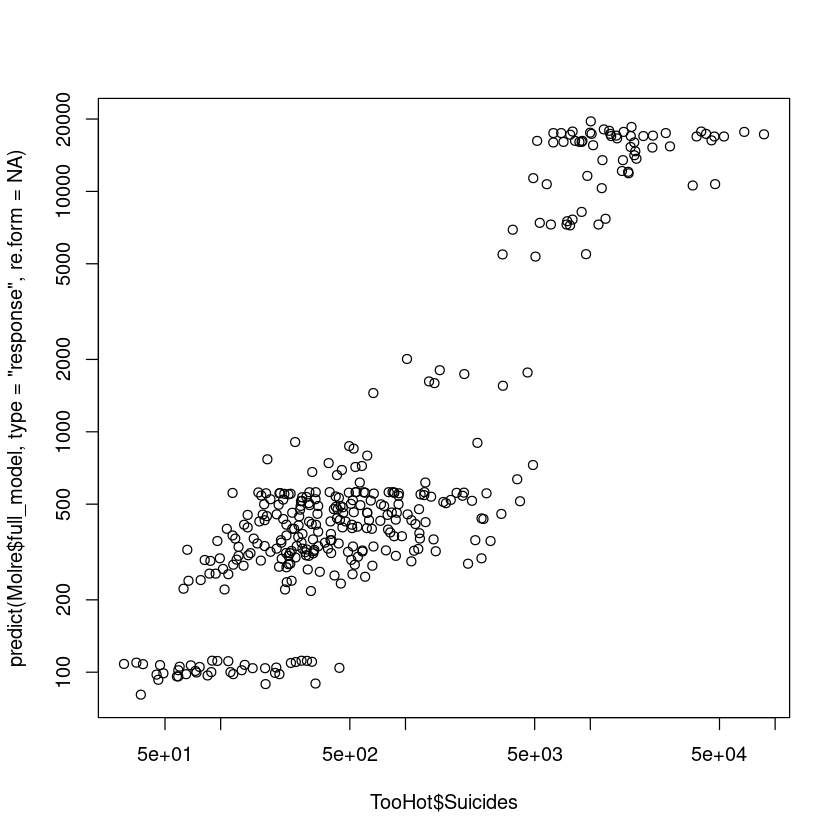

In [58]:
# ?lme4::predict.merMod
# include random effect to predict
plot(predict(Molre$full_model,type = 'response',re.form=NULL) ~ TooHot$Suicides, log="xy")

# exclude random effect to predict
plot(predict(Molre$full_model,type = 'response',re.form=NA  ) ~ TooHot$Suicides, log="xy")


In [59]:
AIC(Mpoisson,Mnb,Molre$full_model)

,df,AIC
,<dbl>,<dbl>
Mpoisson,14,701516.485
Mnb,15,5359.911
Molre$full_model,15,5297.492


### Vérification par validation croisée
Problème, si un pays rare n'est pas présent dans les données `train` mais est présent dans les données `test`  </br>
=> on excus les les pays rare

In [60]:
sort(table(TooHot$Country))

exclud = names(table(TooHot$Country))[table(TooHot$Country) < 3]
exclud


     Vietnam       Taiwan  Philippines  South Korea  Switzerland           UK 
           1            3            4            6            8           10 
      Brazil       Canada South Africa        Japan        Spain          USA 
          13           26           39           47           50          134 

[1] "Vietnam"

In [61]:
TooHotCV = TooHot[!is.element(TooHot$Country, exclud),]
sort(table(TooHotCV$Country))


      Taiwan  Philippines  South Korea  Switzerland           UK       Brazil 
           3            4            6            8           10           13 
      Canada South Africa        Japan        Spain          USA 
          26           39           47           50          134 

In [62]:
nrow(TooHotCV)

[1] 340

In [63]:
k = 34 # validation fold
k = 5 # validation fold
grpCV = rep(1:k,length.out = nrow(TooHotCV))

# Shuffle !!
repeatShuffle = T
while(repeatShuffle){
    TooHotCV$grpCV = sample(grpCV)
    # To have all countries in all test set, we must avoid having one group with all occurrences of a country
    occurrences = table(TooHotCV$grpCV, TooHotCV$Country) != 0
    repeatShuffle = !all(apply(occurrences,2,sum) > 1)
}

table(TooHotCV$grpCV, TooHotCV$Country)
table(TooHotCV$grpCV)

   
    Brazil Canada Japan Philippines South Africa South Korea Spain Switzerland
  1      3      0    10           1           12           1     8           2
  2      0      8    11           0            6           2     9           1
  3      4      7    11           1            7           2    15           2
  4      2      7     8           2           10           0    11           0
  5      4      4     7           0            4           1     7           3
   
    Taiwan UK USA
  1      1  1  29
  2      1  2  28
  3      1  0  18
  4      0  4  24
  5      0  3  35


 1  2  3  4  5 
68 68 68 68 68 

In [64]:
# ?lme4::predict.merMod

In [65]:
Results = NULL
for(g in 1:k){
    # g = 1
     test  = TooHotCV[TooHotCV$grpCV==g , ]
    train = TooHotCV[TooHotCV$grpCV!=g , ]
       Mod = suppressWarnings( list(
         'Molre' = update(object = Molre$full_model, data = train)
        ,'Mquas' = update(object = Mquasipoisson   , data = train)
        ,'Mnb'   = update(object = Mnb             , data = train)
    ))

    # predict(Mod$Mnb, newdata = test)

    pred = list('Molre' = predict(Mod$Molre, newdata = test, re.form = NA) # don't use the random effects to predict -- allow.new.levels = T 
               ,'Mquas' = predict(Mod$Mquas, newdata = test)
               ,'Mnb'   = predict(Mod$Mnb  , newdata = test)
    )

    Results = rbind.data.frame(Results,
        apply(
            sweep(as.data.frame(pred),MARGIN = 1,STATS = log(test$Suicides),FUN = '-')^2
        ,2,sum)
    )
    
    }
colnames(Results) = names(pred)

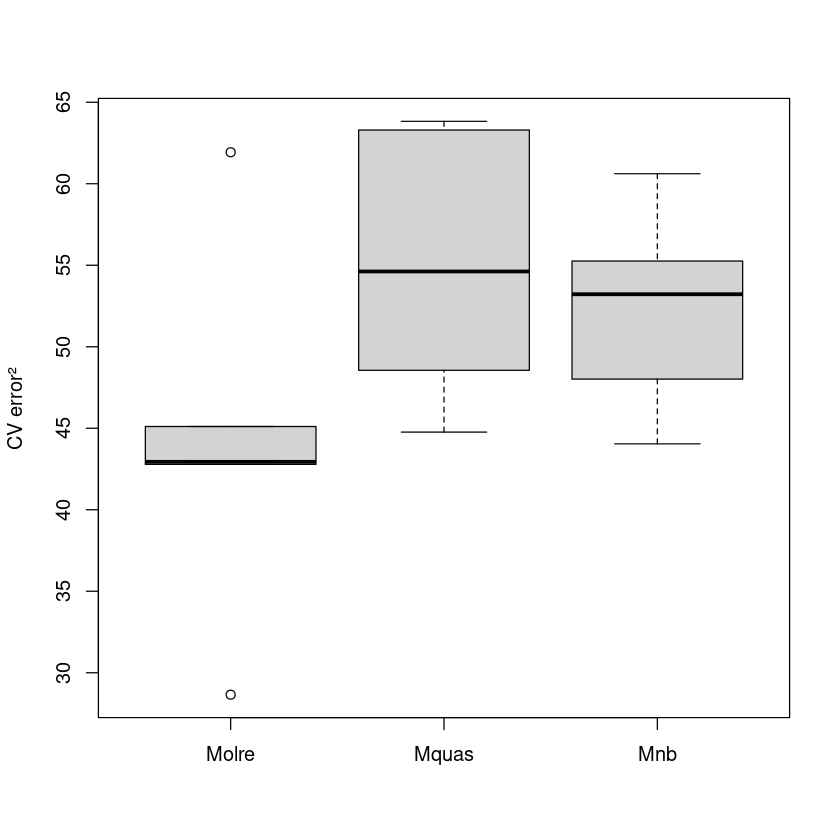

In [66]:
boxplot(Results,ylab='CV error²')

Dans notre cas, il n'y pas de $0$, donc certainement pas de zéro-inflation. Mais s'il y en avait eu, on aurait pu tester l'inflation comme cela :

In [67]:
testZeroInflation(Mpoisson, plot=F)


	DHARMa zero-inflation test via comparison to expected zeros with
	simulation under H0 = fitted model

data:  simulationOutput
ratioObsSim = NaN, p-value = 1
alternative hypothesis: two.sided


In [68]:
try(testZeroInflation(Mquasipoisson, plot=F))

Error in simulate.lm(object, nsim = nsim, ...) : 
  family 'quasipoisson' not implemented


In [69]:
testZeroInflation(Mnb, plot=F)


	DHARMa zero-inflation test via comparison to expected zeros with
	simulation under H0 = fitted model

data:  simulationOutput
ratioObsSim = 0, p-value = 1
alternative hypothesis: two.sided
